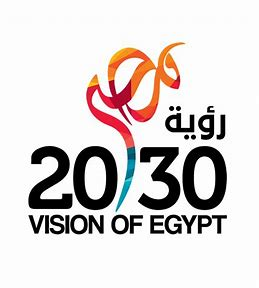

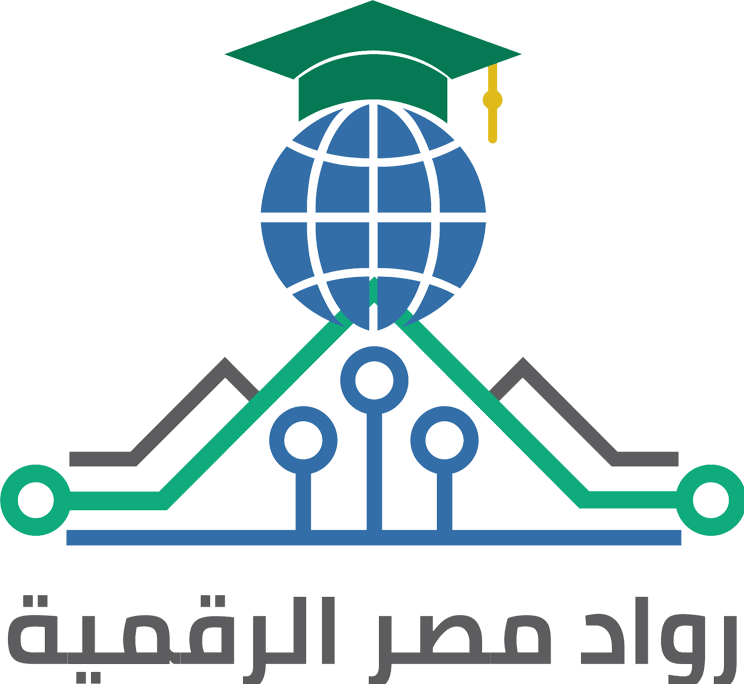

# Project: Land Cover Classification using Sentinel-2 Satellite Imagery

*By*
> EGVision Pioneers Team

**Project Overview**:
This Notebook implements a robust, end-to-end deep learning pipeline for land cover classification using Sentinel-2 satellite imagery, leveraging the EuroSAT dataset adapted to target five key land cover classes relevant to regions such as Egypt. The methodology follows a structured, milestone-based

**Approach encompassing**:
1. Data Acquisition Strategy & Exploratory Data Analysis (EDA)
2. Comprehensive Data Preprocessing & Augmentation
3. Definition of Candidate Deep Learning Architectures (CNN, Transfer Learning)
4. Rigorous Hyperparameter Tuning using KerasTuner's Bayesian Optimization
5. Selection and Refinement of the Optimal Model Configuration
6. Final Model Training with Advanced Callbacks (EarlyStopping, Checkpointing)
7. Thorough Performance Evaluation on an independent Test Set
8. Model Persistence and Deployment Considerations

> Key optimizations include tunable regularization, AdamW optimizer, class weighting,enhanced data augmentation, and Bayesian Optimization f hyperparameter search,all targeted at maximizing accuracy and generalization on the 64x64 input images.


# Milestone 1: Data Collection, Exploration, and Preprocessing

**Objectives**:
 - Specify and verify the path to the local EuroSAT dataset.  
 - Conduct Exploratory Data Analysis (EDA) on source data characteristics.
 - Implement data preprocessing: class mapping, train/validation/test splitting,
 - image resizing, normalization, and tensor conversion via generators.
 - Apply enhanced data augmentation techniques to the training set.

**Deliverables**:
- Functional code for data loading, mapping, splitting, and augmentation.
- EDA visualizations (source image samples, processed data distributions).  
- TensorFlow ImageDataGenerators ready for model input.

In [1]:
print("=================================================")
print("Milestone 1: Data Handling & EDA")
print("=================================================\n")
# Step 1.01: Download and Unpack Dataset using KaggleHub
"""
print("\nStep 1.01: Downloading and unpacking EuroSAT dataset via KaggleHub...")
!pip install kagglehub --quiet
import sys
import kagglehub
from pathlib import Path
# Define the Kaggle dataset handle
dataset_handle = "ahm7daz0uz/eurosat-dataset"
download_path = None # Initialize path variable
try:
    # kagglehub.dataset_download returns the path to the *downloaded* (and typically unpacked) files
    # It handles caching automatically.
    print(f"Downloading dataset '{dataset_handle}'...")
    download_path = kagglehub.dataset_download(dataset_handle)
    print(f"Dataset downloaded and unpacked to: {download_path}")

    # --- MODIFICATION: Set EUROSAT_DIR dynamically ---
    # IMPORTANT: We need to find the actual directory *containing the class folders*
    # The path returned by kagglehub might be the parent directory. Often, the dataset
    # is unpacked into a subdirectory with a standard name like 'dataset' or the dataset slug.
    # We assume here the class folders (AnnualCrop, Forest, etc.) are directly inside
    # the path returned OR inside a 'dataset' subdirectory. Adjust if needed.

    possible_data_dir = Path(download_path)
    # Check if class folders exist directly in download_path
    if not (possible_data_dir / "AnnualCrop").exists(): # Check for a known class folder
        # If not, check common subdirectory names
        if (possible_data_dir / "dataset").is_dir() and (possible_data_dir / "dataset" / "AnnualCrop").exists():
             EUROSAT_DIR = possible_data_dir / "dataset"
        elif (possible_data_dir / "EuroSAT").is_dir() and (possible_data_dir / "EuroSAT" / "AnnualCrop").exists(): # Another common name
             EUROSAT_DIR = possible_data_dir / "EuroSAT"
        elif (possible_data_dir / "EuroSAT_RGB").is_dir() and (possible_data_dir / "EuroSAT_RGB" / "AnnualCrop").exists(): # Another possibility
             EUROSAT_DIR = possible_data_dir / "EuroSAT_RGB"
        else:
             # If unsure, default to the download path but warn the user
             EUROSAT_DIR = possible_data_dir
             print(f"Warning: Could not automatically determine the exact subdirectory containing class folders within {download_path}.")
             print(f"Assuming data is directly in: {EUROSAT_DIR}. Please verify.")
    else:
         # Class folders are directly in the download path
         EUROSAT_DIR = possible_data_dir

    print(f"Dynamically set EUROSAT_DIR to: {EUROSAT_DIR}")
    # --- END MODIFICATION ---

    print("\n" + "-" * 80)
    print("✅ Step 1.01: Dataset downloaded and unpacked successfully via KaggleHub.")
    print("-" * 80 + "\n")

except Exception as e:
    print(f"\nERROR: Failed to download or unpack dataset using kagglehub: {e}")
    import traceback
    traceback.print_exc()
    print("       Ensure you are in an environment with Kaggle API credentials configured")
    print("       (e.g., running within Kaggle, or having ~/.kaggle/kaggle.json set up locally).")
    print("\n" + "-" * 80)
    print("❌ Step 1.01: Dataset download/unpack failed.")
    print("-" * 80 + "\n")
    sys.exit("Exiting: Cannot proceed without dataset.")

# Step 1.02: Verify Data Source Path (Post-Download)
print("\nStep 1.02: Verifying the actual dataset directory path after download...")
# Now verify the dynamically set EUROSAT_DIR
if 'EUROSAT_DIR' not in globals() or not EUROSAT_DIR.exists() or not EUROSAT_DIR.is_dir():
    print(f"\nERROR: The determined EuroSAT directory does not exist or is invalid:")
    print(f"       '{EUROSAT_DIR if 'EUROSAT_DIR' in globals() else 'Not Set'}'")
    print("       Check the download step output and the structure of the downloaded dataset.")
    sys.exit("Exiting: Data source verification failed after download.")
else:
    # Confirm successful verification
    print(f"Successfully located unpacked EuroSAT data source at: {EUROSAT_DIR}")
    # Optional: List contents for quick verification
    print("Contents (first few items):")
    for item in list(EUROSAT_DIR.iterdir())[:5]: print(f"  - {item.name}")
    print("\n" + "-" * 80)
    print("✅ Step 1.02: Actual data source path verified successfully.")
    print("-" * 80 + "\n")
"""
print("✅ Step 1.01 & 1.02: The steps have already been completed, the working environment is already Kaggle.")

Milestone 1: Data Handling & EDA

✅ Step 1.01 & 1.02: The steps have already been completed, the working environment is already Kaggle.


In [2]:
print("--- Step 1.2: Installing Libraries ---")

# Step 1.2: Install Required Libraries
# Ensure necessary libraries are installed quietly. KerasTuner is essential.
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow pillow Keras-Tuner -qq
print("\n" + "-" * 80)
print("✅ Step 1.2: Library installation command executed (or skipped if already installed).")
print("-" * 80 + "\n")

--- Step 1.2: Installing Libraries ---

--------------------------------------------------------------------------------
✅ Step 1.2: Library installation command executed (or skipped if already installed).
--------------------------------------------------------------------------------



In [3]:
# Step 1.3: Import Libraries
print("\nStep 1.3: Importing necessary libraries...")
# Standard Libraries
import os
import sys
import random
import shutil
import zipfile
import urllib.request
from pathlib import Path
from typing import Dict, List, Tuple, Optional, Union
import gc # Garbage Collector for explicit memory management

# Data Handling and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from IPython.display import display # For nicer DataFrame printing in notebooks

# Machine Learning Core - TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks, regularizers
from tensorflow.keras.applications import ResNet50, VGG16 # Transfer Learning base models
from tensorflow.keras.losses import CategoricalCrossentropy # Loss function with label smoothing support
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Scikit-learn Utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score,
                             precision_score, recall_score, f1_score)
from sklearn.utils import class_weight # For class weighting calculation

# Hyperparameter Tuning
import keras_tuner as kt

print("\n" + "-" * 80)
print("✅ Step 1.3: Necessary libraries imported.")
print("-" * 80 + "\n")


Step 1.3: Importing necessary libraries...


2025-05-08 16:50:31.108247: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746723031.308447      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746723031.362922      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



--------------------------------------------------------------------------------
✅ Step 1.3: Necessary libraries imported.
--------------------------------------------------------------------------------



In [4]:
# Step 1.4: Global Settings and Configuration
print("\nStep 1.4: Configuring global settings (Seed, GPU Check, Plot Style)...")
# Seed for reproducibility across libraries
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

# Hardware Check
print("\nChecking for GPU availability...")
gpu_devices = tf.config.list_physical_devices('GPU')
print("GPU Available: ", gpu_devices if gpu_devices else "None")
if not gpu_devices:
    print("WARNING: No GPU detected by TensorFlow. Training and HPT will rely on CPU and may be extremely slow.")

# Plotting Style Configuration
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.dpi'] = 90 # Slightly increase default DPI for clarity

print("\n" + "-" * 80)
print("✅ Step 1.4: Global settings configured (Seed, GPU check, Plot style).")
print("-" * 80 + "\n")


Step 1.4: Configuring global settings (Seed, GPU Check, Plot Style)...

Checking for GPU availability...
GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

--------------------------------------------------------------------------------
✅ Step 1.4: Global settings configured (Seed, GPU check, Plot style).
--------------------------------------------------------------------------------



In [5]:
# Step 1.5: Define User Configuration Paths
print("\nStep 1.5: Defining User Configuration Paths...")
# !!! IMPORTANT: VERIFY this path points correctly to your local EuroSAT dataset location !!!
EUROSAT_DIR = Path(r'/kaggle/input/eurosat-rgb-dataset/dataset') # Example Kaggle path (Verify this!)

# Define output directory structure (created automatically if they don't exist)
BASE_OUTPUT_DIR = Path('./LandCover_Egypt_Optimized_Output_Final') # Unique name for this execution run
PROCESSED_DIR = BASE_OUTPUT_DIR / 'processed_data'       # Stores split train/val/test image data
MODELS_DIR = BASE_OUTPUT_DIR / 'models'                # Parent directory for saved models
CHECKPOINTS_DIR = MODELS_DIR / 'checkpoints'           # Stores best model checkpoints during training
HPT_LOG_DIR = BASE_OUTPUT_DIR / 'hpt_logs'             # Stores KerasTuner logs and trial states
FINAL_MODEL_DIR = MODELS_DIR / 'final_optimized_model' # Directory for the final production-ready model

# Ensure base output directory exists to avoid errors later
BASE_OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
print(f"\nOutput files (processed data, logs, models) will be saved under: {BASE_OUTPUT_DIR.resolve()}")

print("\n" + "-" * 80)
print("✅ Step 1.5: Configuration paths defined and base output directory created/verified.")
print("-" * 80 + "\n")


Step 1.5: Defining User Configuration Paths...

Output files (processed data, logs, models) will be saved under: /kaggle/working/LandCover_Egypt_Optimized_Output_Final

--------------------------------------------------------------------------------
✅ Step 1.5: Configuration paths defined and base output directory created/verified.
--------------------------------------------------------------------------------



In [6]:
# Step 1.6: Verify Data Source Path
print("\nStep 1.6: Verifying specified EuroSAT data source path...")
# Verify the existence and type of the specified EuroSAT source directory.
# The path was defined in the previous task (EUROSAT_DIR).
if not EUROSAT_DIR.exists() or not EUROSAT_DIR.is_dir():
    print(f"\nERROR: EuroSAT directory not found or is not a directory at the specified path:")
    print(f"       '{EUROSAT_DIR}'")
    print("       Please ensure the path is correct and the EuroSAT dataset is downloaded and extracted there.")
    # Stop execution if the data source is critical and not found
    sys.exit("Exiting: Data source verification failed.")
else:
    # Confirm successful verification
    print(f"Successfully located EuroSAT data source at: {EUROSAT_DIR}")
    print("\n" + "-" * 80)
    print("✅ Step 1.6: Data source path verified successfully.")
    print("-" * 80 + "\n")


Step 1.6: Verifying specified EuroSAT data source path...
Successfully located EuroSAT data source at: /kaggle/input/eurosat-rgb-dataset/dataset

--------------------------------------------------------------------------------
✅ Step 1.6: Data source path verified successfully.
--------------------------------------------------------------------------------



In [7]:
# Step 1.7: List Available Source Classes
print("\nStep 1.7: Identifying available classes in the source directory...")
# Identify and list available classes (subdirectories) present in the source directory
available_eurosat_classes = sorted([d.name for d in EUROSAT_DIR.iterdir() if d.is_dir()])
if not available_eurosat_classes:
     print("ERROR: No class subdirectories found within the specified EuroSAT directory.")
     sys.exit("Exiting: Cannot explore an empty EuroSAT directory.")
# Display the found classes
print("Original EuroSAT classes found:")
for class_name in available_eurosat_classes:
    print(f"- {class_name}")
print(f"Total source classes found: {len(available_eurosat_classes)}")
print("\n" + "-" * 80)
print("✅ Step 1.7: Source classes identified and listed.")
print("-" * 80 + "\n")


Step 1.7: Identifying available classes in the source directory...
Original EuroSAT classes found:
- AnnualCrop
- Forest
- HerbaceousVegetation
- Highway
- Industrial
- Pasture
- PermanentCrop
- Residential
- River
- SeaLake
Total source classes found: 10

--------------------------------------------------------------------------------
✅ Step 1.7: Source classes identified and listed.
--------------------------------------------------------------------------------



In [8]:
# Step 1.8: Define Image Processing Properties
print("\nStep 1.8: Defining target image processing properties...")
# Define image properties based on EuroSAT dataset characteristics and project requirements
IMG_SIZE = 64       # Using the native 64x64 resolution of EuroSAT RGB images
IMG_CHANNELS = 3    # RGB color channels
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, IMG_CHANNELS) # Expected input tensor shape for models
print(f"Target Image Processing Size set to: {IMG_SIZE}x{IMG_SIZE} pixels.")
print(f"Number of Channels set to: {IMG_CHANNELS} (RGB).")
print(f"Model Input Shape set to: {IMG_SHAPE}")
print("\n" + "-" * 80)
print("✅ Step 1.8: Image processing properties defined.")
print("-" * 80 + "\n")


Step 1.8: Defining target image processing properties...
Target Image Processing Size set to: 64x64 pixels.
Number of Channels set to: 3 (RGB).
Model Input Shape set to: (64, 64, 3)

--------------------------------------------------------------------------------
✅ Step 1.8: Image processing properties defined.
--------------------------------------------------------------------------------




Step 1.9: Displaying sample images from source EuroSAT classes...
Attempting to display 2 samples for up to 5 classes...
  - Displaying samples for AnnualCrop...
  - Displaying samples for Forest...
  - Displaying samples for HerbaceousVegetation...
  - Displaying samples for Highway...
  - Displaying samples for Industrial...


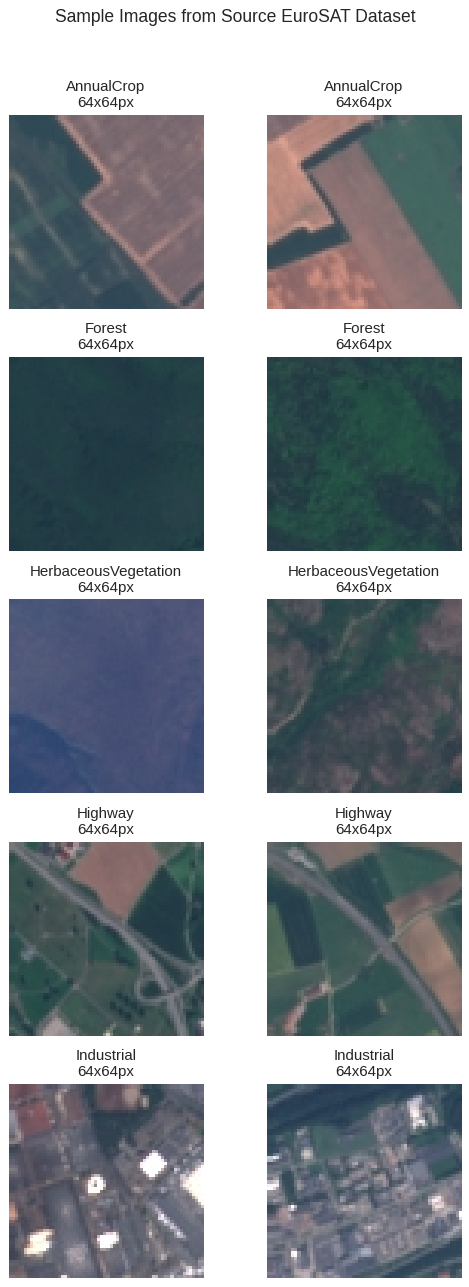


--------------------------------------------------------------------------------
✅ Step 1.9: Source dataset sample images displayed.
--------------------------------------------------------------------------------



In [9]:
# Step 1.9: Display Sample Source Images
print("\nStep 1.9: Displaying sample images from source EuroSAT classes...")
# Function to display sample images directly from the source dataset folders
def display_source_samples(source_dir: Path, classes_to_show: List[str], samples_per_class: int = 2):
    """Displays sample images directly from source folders with original size info."""
    print(f"Attempting to display {samples_per_class} samples for up to {len(classes_to_show)} classes...")
    n_classes = len(classes_to_show)
    # Create a subplot grid dynamically based on the number of classes and samples
    fig, axes = plt.subplots(n_classes, samples_per_class, figsize=(samples_per_class * 3, n_classes * 3), squeeze=False) # Ensure axes is always 2D

    plot_shown_flag = False
    for i, class_name in enumerate(classes_to_show):
        class_dir = source_dir / class_name
        if not class_dir.is_dir():
            print(f"  - Skipping {class_name}: Directory not found.")
            for j in range(samples_per_class): axes[i, j].set_title(f"{class_name}\n(Not Found)"); axes[i, j].axis('off')
            continue

        img_files = list(class_dir.glob("*.jpg")) + list(class_dir.glob("*.png")) # Find common image types
        if not img_files:
             print(f"  - Skipping {class_name}: No images found.")
             for j in range(samples_per_class): axes[i, j].set_title(f"{class_name}\n(No Images)"); axes[i, j].axis('off')
             continue

        # Randomly select samples to display
        print(f"  - Displaying samples for {class_name}...")
        sample_paths = random.sample(img_files, min(len(img_files), samples_per_class))
        for j in range(samples_per_class):
             ax = axes[i, j]
             if j < len(sample_paths):
                 try:
                     img = Image.open(sample_paths[j])
                     ax.imshow(img); ax.set_title(f"{class_name}\n{img.size[0]}x{img.size[1]}px"); # Show original size in title
                     plot_shown_flag = True
                 except Exception as img_err:
                     print(f"    Error loading image {sample_paths[j].name}: {img_err}")
                     ax.set_title(f"{class_name}\n(Load Error)")
             else:
                 # Handle cases where fewer samples were available than requested
                 ax.set_title(f"{class_name}\n(No more samples)")
             ax.axis('off') # Turn off axis labels and ticks

    # Display the plot only if images were successfully loaded and plotted
    if plot_shown_flag:
        plt.suptitle("Sample Images from Source EuroSAT Dataset", fontsize=14)
        plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout
        plt.show() # Display the generated plot
        print("\n" + "-" * 80)
        print("✅ Step 1.9: Source dataset sample images displayed.")
        print("-" * 80 + "\n")
    else:
        # If no images could be plotted at all
        print("Could not display any source samples (check paths and image files).")
        print("\n" + "-" * 80)
        print("⚠️ Step 1.9: Source dataset sample display skipped (no images found/shown).")
        print("-" * 80 + "\n")

# Execute the function to display samples for a subset (e.g., first 5) of the original classes
display_source_samples(EUROSAT_DIR, available_eurosat_classes[:5], samples_per_class=2)

In [10]:
# Define Target Classes and Mapping for Egyptian Context
# Step 1.10: Define Final Target Classes
print("\nStep 1.10: Defining the target land cover classes for the project...")    
# Define the 5 target classes relevant to the project context
EGYPT_LAND_CLASSES = [
    "Agricultural Land", "Water Bodies", "Urban Areas", "Roads", "Trees"
]
# Store the number of classes, crucial for model output layers and HPT functions
NUM_CLASSES = len(EGYPT_LAND_CLASSES)
print(f"Number of target classes defined: {NUM_CLASSES}")
print(f"Target classes: {EGYPT_LAND_CLASSES}")
print("\n" + "-" * 80)
print(f"✅ Step 1.10: Target classes ({NUM_CLASSES}) defined.")
print("-" * 80 + "\n")


Step 1.10: Defining the target land cover classes for the project...
Number of target classes defined: 5
Target classes: ['Agricultural Land', 'Water Bodies', 'Urban Areas', 'Roads', 'Trees']

--------------------------------------------------------------------------------
✅ Step 1.10: Target classes (5) defined.
--------------------------------------------------------------------------------



In [11]:
# Step 1.11: Define Source-to-Target Class Mapping
print("\nStep 1.11: Defining the mapping from source EuroSAT classes to target classes...")
# Define the dictionary that maps available EuroSAT source classes to the desired target classes
# This dictionary determines which source images are used and how they are labeled.
EGYPT_LAND_MAPPING = {
    # Source EuroSAT Class : Target Egyptian Class
    "AnnualCrop":          "Agricultural Land",
    "Forest":              "Trees",
    "HerbaceousVegetation":"Agricultural Land",
    "Highway":             "Roads",
    "Industrial":          "Urban Areas",
    "Pasture":             "Agricultural Land",
    "PermanentCrop":       "Agricultural Land",
    "Residential":         "Urban Areas",
    "River":               "Water Bodies",
    "SeaLake":             "Water Bodies"
    # Note: Any EuroSAT classes not listed here will be ignored during data processing.
}
print("Mapping used from EuroSAT source to target classes:")
# Print only the mappings that result in one of the final target classes for clarity
mapping_display_count = 0
for src, tgt in EGYPT_LAND_MAPPING.items():
    # Ensure the target in the mapping is one of the classes we defined above
    if tgt in EGYPT_LAND_CLASSES:
        print(f"- Source '{src}' ----------------------> Target '{tgt}'")
        mapping_display_count += 1
print(f"Total mappings defined and used: {mapping_display_count}")
print("\n" + "-" * 80)
print("✅ Step 1.11: Source-to-target class mapping defined.")
print("-" * 80 + "\n")


Step 1.11: Defining the mapping from source EuroSAT classes to target classes...
Mapping used from EuroSAT source to target classes:
- Source 'AnnualCrop' ----------------------> Target 'Agricultural Land'
- Source 'Forest' ----------------------> Target 'Trees'
- Source 'HerbaceousVegetation' ----------------------> Target 'Agricultural Land'
- Source 'Highway' ----------------------> Target 'Roads'
- Source 'Industrial' ----------------------> Target 'Urban Areas'
- Source 'Pasture' ----------------------> Target 'Agricultural Land'
- Source 'PermanentCrop' ----------------------> Target 'Agricultural Land'
- Source 'Residential' ----------------------> Target 'Urban Areas'
- Source 'River' ----------------------> Target 'Water Bodies'
- Source 'SeaLake' ----------------------> Target 'Water Bodies'
Total mappings defined and used: 10

--------------------------------------------------------------------------------
✅ Step 1.11: Source-to-target class mapping defined.
---------------

In [12]:
# Step 1.12: Define Data Splitting Function
print("\nStep 1.12: Defining the data splitting and copying function...")
# Function to prepare data splits by collecting, splitting, and copying files
def prepare_egypt_land_classification(
    eurosat_dir: Path,
    output_dir: Path,
    egypt_classes: List[str],
    eurosat_to_egypt_map: Dict[str, str],
    train_ratio: float = 0.7,
    val_ratio: float = 0.15,
    test_ratio: float = 0.15
) -> Optional[Dict[str, Path]]:
    """
    Prepares data splits (train/val/test) based on the provided mapping.
    Creates directories for all specified target classes.
    Copies files only for source classes present in the mapping keys, ensuring
    unique filenames in destination directories using the format:
    {source_class}_{split_name}_{index:05d}.{extension}
    Returns dictionary of dataset paths {train: path, val: path, test: path}
    or None on critical failure.
    """
    print(f"\nInitiating data split process. Output will be in: {output_dir}")
    # Ensure base output directory exists and define train/val/test paths
    output_dir.mkdir(parents=True, exist_ok=True)
    train_dir = output_dir / "train"
    val_dir = output_dir / "val"
    test_dir = output_dir / "test"

    # Create target directory structure for all specified target classes within train, val, and test
    print("Creating/Verifying directory structure for target classes...")
    for directory in [train_dir, val_dir, test_dir]:
        directory.mkdir(exist_ok=True) # Create train/val/test if they don't exist
        for egypt_class in egypt_classes:
            (directory / egypt_class).mkdir(exist_ok=True) # Create target class subdirs
    print("Directory structure ensured.")

    # --- File Collection Phase ---
    print("\nCollecting source file paths based on the defined mapping...")
    file_paths = {}             # Stores {source_class: [path1, path2,...]}
    total_source_files = 0
    # Track initial counts per target class based on source mapping
    mapped_target_counts = {cls: 0 for cls in egypt_classes}

    # Iterate through the mapping to find relevant source files
    for source_class, target_class in eurosat_to_egypt_map.items():
        # Only process mappings where the target class is in our final list
        if target_class not in egypt_classes:
            continue
        class_dir = eurosat_dir / source_class
        if class_dir.is_dir():
             # Collect both .jpg and .png image files
             paths = list(class_dir.glob("*.jpg")) + list(class_dir.glob("*.png"))
             if paths:
                 file_paths.setdefault(source_class, []).extend(paths) # Append paths
                 total_source_files += len(paths)
                 mapped_target_counts[target_class] += len(paths) # Increment target count
             else:
                 print(f"  - Note: No images (.jpg, .png) found in source directory: {source_class}")
        else:
            # Warn if a source directory specified in the mapping doesn't exist
            print(f"  - Warning: Source directory specified in mapping not found: {class_dir}")

    print(f"\nCollected {total_source_files} source images corresponding to the {len(egypt_classes)} target classes via mapping.")
    print("Source file contribution to target classes (before splitting):")
    # Display counts for all target classes
    for cls in egypt_classes:
        print(f"  - {cls}: {mapped_target_counts.get(cls, 0)} images")

    # Critical check: Exit if no source files were found for any mapped classes
    if not file_paths:
        print("\nERROR: No source image files were found for any specified mappings. Cannot proceed.")
        return None

    # --- Ratio Validation and Normalization ---
    # Validate and, if necessary, normalize splitting ratios so they sum to 1.0
    print("\nValidating splitting ratios...")
    if not np.isclose(train_ratio + val_ratio + test_ratio, 1.0):
        print(f"  Warning: Ratios ({train_ratio}, {val_ratio}, {test_ratio}) do not sum to 1.0. Normalizing...")
        total_ratio = train_ratio + val_ratio + test_ratio
        if total_ratio <= 0: print("  ERROR: Sum of ratios is non-positive. Cannot normalize."); return None
        train_ratio = train_ratio / total_ratio
        val_ratio = val_ratio / total_ratio
        test_ratio = test_ratio / total_ratio
    print(f"Using splitting ratios: Train={train_ratio:.2f}, Val={val_ratio:.2f}, Test={test_ratio:.2f}")

    # Initialize dictionary to track final counts in each destination split directory
    split_counts = {'train': {cls: 0 for cls in egypt_classes}, 'val': {cls: 0 for cls in egypt_classes}, 'test': {cls: 0 for cls in egypt_classes}}

    # --- Splitting and Copying Phase ---
    print("\nProcessing and copying files for each mapped source class...")
    # Process files for each source class that was found and added to file_paths
    for source_class, paths in file_paths.items():
        target_class = eurosat_to_egypt_map[source_class] # Target class for these files

        # Ensure enough images exist for a meaningful split
        if len(paths) < 3:
            print(f"  - Warning: Skipping split for {source_class} -> {target_class} (only {len(paths)} images found, need at least 3).")
            continue

        print(f"  Splitting and copying for: {source_class} -> {target_class} ({len(paths)} images)")
        try:
            # First split: separate training data
            train_paths, temp_paths = train_test_split(paths, train_size=train_ratio, random_state=RANDOM_SEED, shuffle=True)

            # Calculate validation proportion relative to the remaining data
            val_prop = val_ratio / (val_ratio + test_ratio) if (val_ratio + test_ratio) > 1e-6 else 0.5

            val_paths, test_paths = [], [] # Initialize lists

            # Second split: separate validation and test data from the remainder
            if temp_paths and len(temp_paths) >= 2 and 0 < val_prop < 1:
                 val_paths, test_paths = train_test_split(temp_paths, train_size=val_prop, random_state=RANDOM_SEED, shuffle=True)
            elif temp_paths: # If remainder can't be split, assign all to validation
                 val_paths = temp_paths
                 print(f"    Note: Assigning all remaining {len(temp_paths)} images from {source_class} to validation set for {target_class}.")

            # Helper function to copy files with unique names and error handling
            def copy_files(src_paths, dest_dir, src_cls, tgt_cls, split_name):
                dest_cls_dir = dest_dir / tgt_cls
                copied_count = 0
                print(f"    Copying {len(src_paths)} files to {split_name}/{tgt_cls}...")
                for i, src_p_obj in enumerate(src_paths):
                    try:
                        src_p = Path(src_p_obj)
                        dst_fn = f"{src_cls}_{split_name}_{i:05d}{src_p.suffix}" # Unique name
                        destination_path = dest_cls_dir / dst_fn
                        shutil.copy(str(src_p), destination_path)
                        copied_count += 1
                    except Exception as copy_e:
                        print(f"      ERROR copying file '{src_p.name}' to '{destination_path}': {copy_e}")
                print(f"      Successfully copied {copied_count}/{len(src_paths)} files.")
                return copied_count

            # Execute copy for each split and update counts
            split_counts['train'][target_class] += copy_files(train_paths, train_dir, source_class, target_class, "train")
            split_counts['val'][target_class] += copy_files(val_paths, val_dir, source_class, target_class, "val")
            split_counts['test'][target_class] += copy_files(test_paths, test_dir, source_class, target_class, "test")

        except ValueError as split_e:
            print(f"  - Error during splitting process for {source_class}: {split_e}")
        except Exception as general_e:
             print(f"  - Unexpected error processing {source_class}: {general_e}")

    # --- Final Summary ---
    print("\nFinal split counts per target class (based on successfully copied files):")
    for split_name, counts_dict in split_counts.items():
        print(f"  {split_name.capitalize()} Set:")
        # Display counts for all defined target classes
        for cls in egypt_classes:
             print(f"    - {cls}: {counts_dict.get(cls, 0)}")

    print("\nData preparation and splitting process complete!")
    # Return the paths to the newly created train, validation, and test directories
    return {"train": train_dir, "val": val_dir, "test": test_dir}

print("\n" + "-" * 80)
print("✅ Step 1.12: Data splitting function defined.")
print("-" * 80 + "\n")


Step 1.12: Defining the data splitting and copying function...

--------------------------------------------------------------------------------
✅ Step 1.12: Data splitting function defined.
--------------------------------------------------------------------------------



In [13]:
# Step 1.13: Execute Data Splitting
print("\nStep 1.13: Executing the data splitting process...")
data_dirs = {} # Initialize dictionary to store resulting directory paths
try:
    # Call the function to perform the splitting and copying
    data_dirs = prepare_egypt_land_classification(
        eurosat_dir=EUROSAT_DIR,
        output_dir=PROCESSED_DIR,
        egypt_classes=EGYPT_LAND_CLASSES,
        eurosat_to_egypt_map=EGYPT_LAND_MAPPING,
        # Using default ratios: train=0.7, val=0.15, test=0.15
    )
    # Verify if the function returned valid directory paths
    if not data_dirs:
        raise RuntimeError("Data preparation function returned empty or None, indicating a critical failure.")
    print("\n" + "-" * 80)
    print("✅ Step 1.13: Data successfully split into train/validation/test sets.")
    print(f"   Train directory: {data_dirs.get('train')}")
    print(f"   Validation directory: {data_dirs.get('val')}")
    print(f"   Test directory: {data_dirs.get('test')}")
    print("-" * 80 + "\n")
except Exception as e:
    # Catch errors during the execution of the splitting function
    print(f"\nAn error occurred during the data splitting execution: {e}")
    import traceback
    traceback.print_exc() # Print detailed traceback for debugging
    print("\n" + "-" * 80)
    print("❌ Step 1.3 Data splitting failed.")
    print("-" * 80 + "\n")
    # Exit if data splitting is critical for subsequent steps
    sys.exit("Exiting: Data splitting failure.")


Step 1.13: Executing the data splitting process...

Initiating data split process. Output will be in: LandCover_Egypt_Optimized_Output_Final/processed_data
Creating/Verifying directory structure for target classes...
Directory structure ensured.


Collected 27000 source images corresponding to the 5 target classes via mapping.
Source file contribution to target classes (before splitting):
  - Agricultural Land: 10500 images
  - Water Bodies: 5500 images
  - Urban Areas: 5500 images
  - Roads: 2500 images
  - Trees: 3000 images

Validating splitting ratios...
Using splitting ratios: Train=0.70, Val=0.15, Test=0.15

Processing and copying files for each mapped source class...
  Splitting and copying for: AnnualCrop -> Agricultural Land (3000 images)
    Copying 2100 files to train/Agricultural Land...
      Successfully copied 2100/2100 files.
    Copying 450 files to val/Agricultural Land...
      Successfully copied 450/450 files.
    Copying 450 files to test/Agricultural Land...
   

In [14]:
# Step 1.14: Define Data Augmentation Strategy
print("\nStep 1.14: Defining Data Augmentation strategy for the training set...") # Renumbered step
# Verify prerequisites before proceeding: valid directories and class count
if not data_dirs or not all(p.exists() for p in data_dirs.values()) or 'NUM_CLASSES' not in globals() or NUM_CLASSES <= 0:
    print("ERROR: Cannot define generators - prerequisites missing or failed in previous steps.")
    # Invalidate generator variables to prevent errors in later cells
    train_generator, val_generator, test_generator = None, None, None
    class_names_from_generator = []
    print("\n" + "-" * 80)
    print("❌ Step 14: Generator definition and creation skipped.") # Updated step numbers
    print("-" * 80 + "\n")
else:
    # Define ImageDataGenerator for Training set
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.05,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=False,         # Disabled vertical flip
        brightness_range=[0.95, 1.05],# Reduced brightness range
        channel_shift_range=5.0,     # Reduced channel shift
        fill_mode='nearest'
    )

    print("Training Data Augmentation Strategy defined with parameters:")
    print(f" - Rescale: {train_datagen.rescale}")
    print(f" - Rotation Range: +/-{train_datagen.rotation_range} degrees")
    print(f" - Width/Height Shift Range: +/-{train_datagen.width_shift_range*100:.1f}% / +/-{train_datagen.height_shift_range*100:.1f}%")
    print(f" - Shear Range: {train_datagen.shear_range}")

    # Display Zoom Range correctly based on its type
    zoom_range_val = train_datagen.zoom_range
    if isinstance(zoom_range_val, (list, tuple)) and len(zoom_range_val) == 2:
        print(f" - Zoom Range: [{zoom_range_val[0]:.2f}, {zoom_range_val[1]:.2f}]")
    elif isinstance(zoom_range_val, (int, float)):
        zoom_lower = 1.0 - zoom_range_val
        zoom_upper = 1.0 + zoom_range_val
        print(f" - Zoom Range: [{zoom_lower:.2f}, {zoom_upper:.2f}] (Calculated from {zoom_range_val})")
    else:
        print(f" - Zoom Range: {zoom_range_val} (Unexpected Type)")

    print(f" - Flips: Horizontal={train_datagen.horizontal_flip}, Vertical={train_datagen.vertical_flip}")
    print(f" - Brightness Range: {train_datagen.brightness_range}")
    print(f" - Channel Shift Range: +/-{train_datagen.channel_shift_range}")
    print(f" - Fill Mode: '{train_datagen.fill_mode}'")

    # Define ImageDataGenerator for Validation & Test sets (only performs rescaling)
    val_test_datagen = ImageDataGenerator(rescale=1./255)
    print("\nValidation/Test Data Generator Strategy: Only Rescale (1./255)")

    print("\n" + "-" * 80)
    print("✅ Step 1.14: Data augmentation strategies defined.")
    print("-" * 80 + "\n")

    # Step 1.15: Create ImageDataGenerators and Calculate Class Weights
    print("\nStep 1.15: Creating ImageDataGenerators and calculating class weights...") # Updated step number
    class_weights = None # Initialize class weights
    try:
        # Create the Training Data Generator instance
        print("Creating training generator...")
        train_generator = train_datagen.flow_from_directory(
            directory=data_dirs['train'],
            target_size=(IMG_SIZE, IMG_SIZE),
            batch_size=32,
            class_mode='categorical',
            shuffle=True, # Keep shuffle=True for training
            seed=RANDOM_SEED
        )
        print(f"Found {train_generator.samples} training images belonging to {train_generator.num_classes} classes.")

        # Calculate Class Weights right after creating train_generator ---
        print("\nCalculating class weights from training generator labels...")
        # Check if the generator has the necessary 'classes' attribute
        if hasattr(train_generator, 'classes') and train_generator.classes is not None:
            # ---------------------------------------------
            labels = train_generator.classes
            unique_classes = np.unique(labels)
            # Ensure the number of unique labels found matches NUM_CLASSES
            if len(unique_classes) == NUM_CLASSES:
                class_weights_calculated = class_weight.compute_class_weight( # Use the imported name
                    class_weight='balanced',
                    classes=unique_classes, # Use the actual unique classes found
                    y=labels
                )
                # Create the dictionary mapping index to weight
                class_weights = dict(enumerate(class_weights_calculated))
                # Retrieve class names in the correct order for printing weights
                temp_class_names = sorted(train_generator.class_indices, key=train_generator.class_indices.get)
                print("Calculated Class Weights:")
                for index, weight in class_weights.items():
                    print(f"  - Index {index} ('{temp_class_names[index]}'): {weight:.3f}")
                print("\n" + "-"*40) # Separator for weights
                print("✅ Class weights calculated.")
                print("-" * 40 + "\n")
            else:
                print(f"Warning: Found {len(unique_classes)} unique labels in generator, but expected {NUM_CLASSES}. Skipping weight calculation.")
                print("\n" + "-"*40)
                print("⚠️ Class weight calculation skipped (label count mismatch).")
                print("-" * 40 + "\n")
        else:
             print("Warning: train_generator.classes attribute not available or empty. Skipping weight calculation.")
             print("\n" + "-"*40)
             print("⚠️ Class weight calculation skipped (labels unavailable).")
             print("-" * 40 + "\n")
        # --- END Class Weight Calculation ---

        # Create the Validation Data Generator instance
        print("Creating validation generator...")
        val_generator = val_test_datagen.flow_from_directory(
            directory=data_dirs['val'],
            target_size=(IMG_SIZE, IMG_SIZE),
            batch_size=32,
            class_mode='categorical',
            shuffle=False
        )
        print(f"Found {val_generator.samples} validation images belonging to {val_generator.num_classes} classes.")


        # Create the Test Data Generator instance
        print("Creating test generator...")
        test_generator = val_test_datagen.flow_from_directory(
            directory=data_dirs['test'],
            target_size=(IMG_SIZE, IMG_SIZE),
            batch_size=32,
            class_mode='categorical',
            shuffle=False
        )
        print(f"Found {test_generator.samples} test images belonging to {test_generator.num_classes} classes.")

        # Final critical verification of class consistency
        if not (train_generator.num_classes == val_generator.num_classes == test_generator.num_classes == NUM_CLASSES):
            print("\nCRITICAL ERROR: Class count mismatch between generators or expected number!")
            print(f"Expected: {NUM_CLASSES}")
            print(f"Found -> Train: {train_generator.num_classes}, Validation: {val_generator.num_classes}, Test: {test_generator.num_classes}")
            raise ValueError("Generator class count mismatch.")
        else:
             class_names_from_generator = sorted(train_generator.class_indices, key=train_generator.class_indices.get)
             print(f"\nData Generators created successfully and consistently for {NUM_CLASSES} classes.")
             print(f"Generator Class Indices Mapping: {train_generator.class_indices}")
             print(f"Class Names (Generator Order): {class_names_from_generator}")
             print("\n" + "-"*80)
             print("✅ Step 1.15: ImageDataGenerators created successfully.") # Updated step number
             print("-" * 80 + "\n")

    # Catch errors during generator creation
    except Exception as gen_e:
        print(f"\nERROR creating data generators from directories: {gen_e}")
        import traceback
        traceback.print_exc()
        train_generator, val_generator, test_generator = None, None, None
        class_names_from_generator = []
        class_weights = None # Ensure weights are None if error
        NUM_CLASSES = 0
        print("\n" + "-" * 80)
        print("❌ Step 1.15: Data generator creation failed.")
        print("-" * 80 + "\n")


Step 1.14: Defining Data Augmentation strategy for the training set...
Training Data Augmentation Strategy defined with parameters:
 - Rescale: 0.00392156862745098
 - Rotation Range: +/-15 degrees
 - Width/Height Shift Range: +/-10.0% / +/-10.0%
 - Shear Range: 0.05
 - Zoom Range: [0.90, 1.10]
 - Flips: Horizontal=True, Vertical=False
 - Brightness Range: [0.95, 1.05]
 - Channel Shift Range: +/-5.0
 - Fill Mode: 'nearest'

Validation/Test Data Generator Strategy: Only Rescale (1./255)

--------------------------------------------------------------------------------
✅ Step 1.14: Data augmentation strategies defined.
--------------------------------------------------------------------------------


Step 1.15: Creating ImageDataGenerators and calculating class weights...
Creating training generator...
Found 18900 images belonging to 5 classes.
Found 18900 training images belonging to 5 classes.

Calculating class weights from training generator labels...
Calculated Class Weights:
  - Ind


Step 1.16: Defining/Verifying EDA helper functions...

--------------------------------------------------------------------------------
✅ Step 1.16: EDA helper functions defined.
--------------------------------------------------------------------------------


Step 1.17: Plotting class distribution for processed train/val/test sets...

Processed Data Class Distribution:
  Analyzing Train Set (LandCover_Egypt_Optimized_Output_Final/processed_data/train)...
    Counts in Train Set:
      - Agricultural Land: 7350
      - Roads: 1750
      - Trees: 2100
      - Urban Areas: 3850
      - Water Bodies: 3850
  Analyzing Val Set (LandCover_Egypt_Optimized_Output_Final/processed_data/val)...
    Counts in Val Set:
      - Agricultural Land: 1575
      - Roads: 375
      - Trees: 450
      - Urban Areas: 825
      - Water Bodies: 825
  Analyzing Test Set (LandCover_Egypt_Optimized_Output_Final/processed_data/test)...
    Counts in Test Set:
      - Agricultural Land: 1575
      - Roads: 375
 

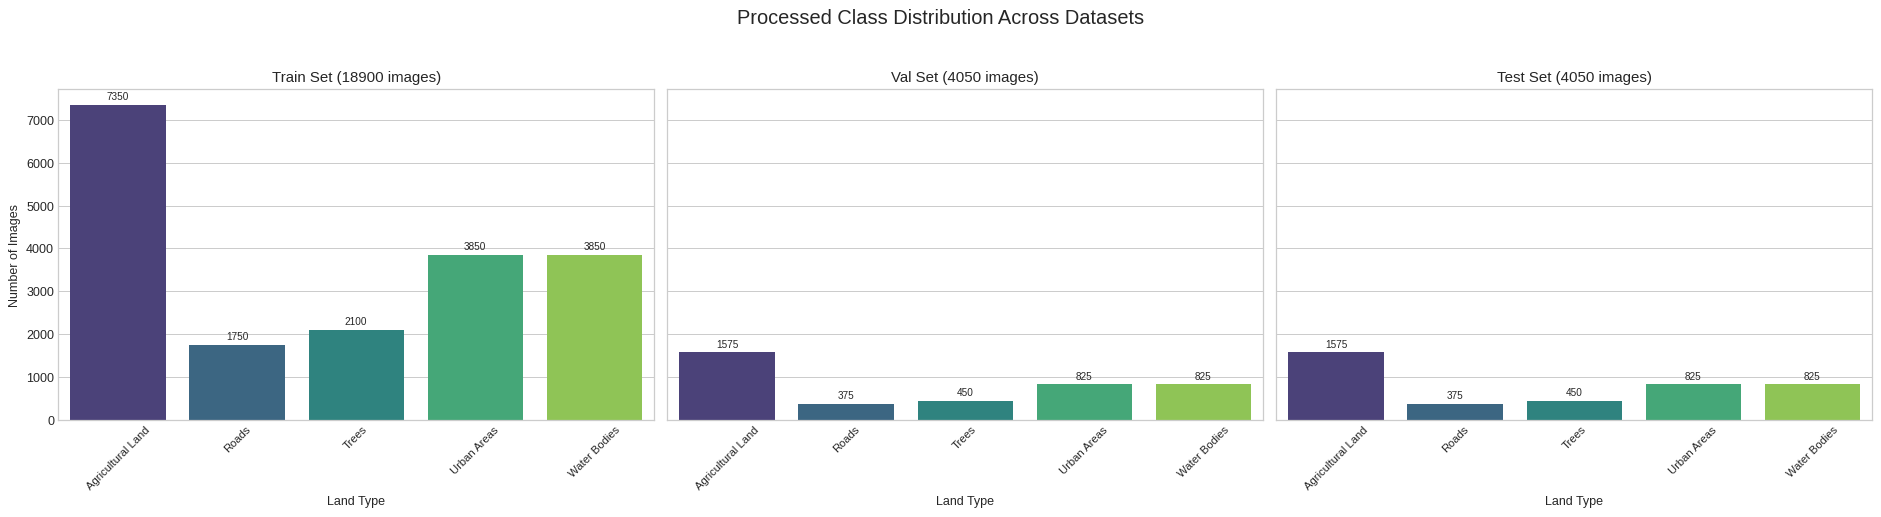


--------------------------------------------------------------------------------
✅ Step 1.17: Processed data distribution plotted successfully.
--------------------------------------------------------------------------------


Step 1.16: Displaying sample augmented images from the Training Generator...

Attempting to display 9 augmented samples from the generator...
Displaying 9 sample augmented images...


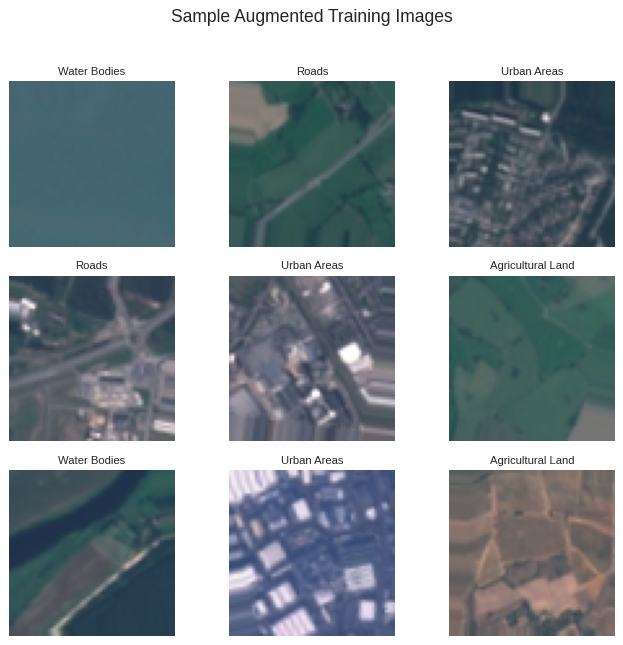


--------------------------------------------------------------------------------
✅ Step 1.18: Sample augmented images displayed successfully.
--------------------------------------------------------------------------------


-------------------------------------------------
✅ Milestone 1 Finished.
-------------------------------------------------



In [15]:
# --- EDA Functions Definition ---
# Step 1.16: Define EDA Helper Functions
print("\nStep 1.16: Defining/Verifying EDA helper functions...")

def count_images_per_class(data_dir: Path) -> Dict[str, int]:
    """Counts images (.jpg, .png) per class subdirectory in a given directory."""
    counts = {}
    if not data_dir.exists():
        print(f"Warning: Directory not found for counting: {data_dir}")
        return counts
    # Iterate through items in the directory
    for class_dir in data_dir.iterdir():
        # Check if the item is a directory (representing a class)
        if class_dir.is_dir():
            # Count images within the class directory
            count = len(list(class_dir.glob("*.jpg"))) + len(list(class_dir.glob("*.png")))
            counts[class_dir.name] = count
    return counts

def plot_class_distribution(data_dirs_dict: Dict[str, Path], target_classes: List[str]):
    """Plots bar charts showing class distribution across the provided dataset splits (train/val/test)."""
    # Check if data directories dictionary is provided and not empty
    if not data_dirs_dict:
        print("Skipping distribution plot: No data directories provided.")
        return False # Indicate failure
    num_splits = len(data_dirs_dict)
    # Create subplots dynamically based on the number of splits
    fig, axes = plt.subplots(1, num_splits, figsize=(7 * num_splits, 6), sharey=True) # Adjust width based on splits
    if num_splits == 1: # Ensure axes is always indexable even if only one split is provided
        axes = [axes]
    print("\nProcessed Data Class Distribution:")
    plot_successful = False # Flag to track if at least one plot is generated
    # Iterate through each split (e.g., 'train', 'val', 'test')
    for i, (split, dir_path) in enumerate(data_dirs_dict.items()):
        print(f"  Analyzing {split.capitalize()} Set ({dir_path})...")
        # Count images in the current split's directory
        counts = count_images_per_class(dir_path)
        # Ensure all target classes are represented in the plot data, even if count is 0
        plot_counts = {cls: counts.get(cls, 0) for cls in target_classes}

        # Check if there is any valid count data to plot for this split
        if not plot_counts or all(v == 0 for v in plot_counts.values()):
            print(f"    No image data found for plotting in {split} set.")
            axes[i].set_title(f'{split.capitalize()} Set (No Data Found)')
            axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center', transform=axes[i].transAxes)
            continue # Skip to the next split if no data

        # Create a Pandas DataFrame for easy plotting with Seaborn
        df = pd.DataFrame(list(plot_counts.items()), columns=['Land Type', 'Count']).sort_values('Land Type')
        # Generate the bar plot using Seaborn
        try:
            sns.barplot(x='Land Type', y='Count', data=df, ax=axes[i], palette='viridis')
        except ValueError as sns_err:
            # Handle potential errors during plotting (e.g., empty dataframe after filtering)
            print(f"    Error during seaborn plot for {split} set: {sns_err}")
            continue # Skip this subplot

        # --- Plot Customization ---
        total_images = df['Count'].sum()
        axes[i].set_title(f'{split.capitalize()} Set ({total_images} images)') # Set subplot title
        axes[i].set_xlabel('Land Type') # Set x-axis label
        # Set Y-axis label only for the first plot to avoid redundancy
        if i == 0: axes[i].set_ylabel('Number of Images')
        else: axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', rotation=45, labelsize=9) # Rotate x-axis labels for better readability

        # Add count labels above each bar for clarity
        for bar in axes[i].patches:
             # Adjust text position slightly above the bar
             text_y_pos = bar.get_height() + max(1, 0.01 * axes[i].get_ylim()[1]) # Adjust dynamically
             axes[i].text(bar.get_x() + bar.get_width() / 2., text_y_pos,
                         f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=8)

        # Print counts for this split to the console output
        print(f"    Counts in {split.capitalize()} Set:")
        for k, v in sorted(plot_counts.items()): print(f"      - {k}: {v}")
        plot_successful = True # Mark success if plotting occurred

    # Display the final figure with all subplots
    if plot_successful:
        plt.suptitle('Processed Class Distribution Across Datasets', fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout
        plt.show()
        return True # Indicate success
    else:
        # Handle case where no data was found in any split to plot
        print("Could not plot class distributions (no image data found in any processed split).")
        return False # Indicate failure

# Define function to display augmented samples (ensure it uses the generator's class names)
def display_augmented_samples(generator, class_names, num_samples=9):
    """Fetches a batch from the generator and displays augmented samples."""
    print(f"\nAttempting to display {num_samples} augmented samples from the generator...")
    # Basic validation checks
    if generator is None:
        print("Generator is not available.")
        return False
    if not class_names:
         print("Class names list is empty.")
         return False

    try:
        # Fetch one batch of augmented images and labels
        augmented_images, augmented_labels = next(generator)
    except StopIteration:
        # Handle case where the generator is exhausted
        print("Warning: Training generator seems empty or exhausted. Cannot display augmented samples.")
        return False
    except Exception as e:
        # Handle other errors during batch fetching
        print(f"Error fetching batch from generator: {e}")
        return False

    # Determine how many samples to actually display (minimum of requested vs available in batch)
    num_samples_to_show = min(num_samples, len(augmented_images))
    if num_samples_to_show == 0:
        print("No augmented images found in the fetched batch.")
        return False

    # Create subplot grid based on the number of samples to show
    grid_size = int(np.ceil(np.sqrt(num_samples_to_show)))
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size * 2.5, grid_size * 2.5))
    # Flatten axes array for easy iteration, handling single image case robustly
    axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

    print(f"Displaying {num_samples_to_show} sample augmented images...")
    # Iterate through the samples to display
    for i in range(num_samples_to_show):
        img = augmented_images[i] # Image data is already rescaled [0, 1] by generator
        label_index = np.argmax(augmented_labels[i]) # Get class index from one-hot vector

        # Safely get class name using the index and provided list
        if 0 <= label_index < len(class_names):
            label_name = class_names[label_index]
        else:
            # Handle unexpected index error gracefully
            label_name = f"Index {label_index} Error"
            print(f"ERROR: Label index {label_index} is out of bounds for {len(class_names)} provided class names.")

        # Display image and predicted label as title
        axes[i].imshow(img)
        axes[i].set_title(label_name, fontsize=9) # Slightly smaller font for title
        axes[i].axis('off') # Hide axis ticks and labels

    # Hide any unused subplots in the grid if num_samples is not a perfect square
    # Now 'num_samples_to_show' is defined and can be used here
    for j in range(num_samples_to_show, len(axes)):
        axes[j].axis('off')

    plt.suptitle("Sample Augmented Training Images", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout
    plt.show() # Display the plot
    return True # Indicate success

print("\n" + "-" * 80)
print("✅ Step 1.16: EDA helper functions defined.")
print("-" * 80 + "\n")

# --- Execute EDA on Processed Data ---
# Proceed only if generators were successfully created in the previous step
if 'train_generator' in globals() and train_generator is not None:

    # Step 17: Plot Processed Data Distribution
    print("\nStep 1.17: Plotting class distribution for processed train/val/test sets...")
    # Call the plotting function
    plot1_success = plot_class_distribution(data_dirs, EGYPT_LAND_CLASSES)
    # Print success or warning message based on plotting result
    if plot1_success:
        print("\n" + "-" * 80)
        print("✅ Step 1.17: Processed data distribution plotted successfully.")
        print("-" * 80 + "\n")
    else:
        print("\n" + "-" * 80)
        print("⚠️ Step 1.17: Processed data distribution plot skipped or failed (check data).")
        print("-" * 80 + "\n")

    # Step 1.18: Display Sample Augmented Images
    print("\nStep 1.16: Displaying sample augmented images from the Training Generator...")
    # Call the function to display augmented samples
    # Ensure class_names_from_generator is valid and available
    if 'class_names_from_generator' in globals() and class_names_from_generator:
        plot2_success = display_augmented_samples(train_generator, class_names_from_generator, num_samples=9)
        # Print success or warning message based on display result
        if plot2_success:
            print("\n" + "-"*80)
            print("✅ Step 1.18: Sample augmented images displayed successfully.")
            print("-"*80 + "\n")
        else:
            print("\n" + "-"*80)
            print("❌ Step 1.18: Failed to display sample augmented images.")
            print("-"*80 + "\n")
    else:
        # Handle case where class names are missing
        print("Cannot display augmented samples: class names list is missing or empty.")
        print("\n" + "-"*80)
        print("❌ Step 1.18: Failed display augmented samples (missing class names).")
        print("-"*80 + "\n")
else:
    # Handle case where generators were not created in the first place
    print("\nSkipping EDA on processed data as generators were not successfully created in Task 1.4c.")
    print("\n" + "-"*80)
    print("⚠️ Steps 18: EDA on processed data skipped.")
    print("-" * 80 + "\n")

print("\n-------------------------------------------------")
print("✅ Milestone 1 Finished.")
print("-------------------------------------------------\n")

# Milestone 2: Model Development and Training

**Objectives**:
  - Outline candidate deep learning architectures (CNN, Transfer Learning).
  - Demonstrate the basic structure of model building functions (refined in M3).
  - Define the overall training strategy and evaluation metrics.

**Deliverables**:
  - Placeholder code for model building functions.
  - Summary printout of an example baseline model architecture.  
  - Textual confirmation of training/evaluation strategy.

In [16]:
print("=================================================");
print("Milestone 2: Model Development & Training Setup");
print("=================================================\n")

# Step 2.1: Verify Prerequisites from Milestone 1
print("\nStep 2.1: Verifying prerequisites from Milestone 1...")
# Check if essential variables (NUM_CLASSES, generators) are valid before proceeding
prerequisites_ok = True
if 'NUM_CLASSES' not in globals() or NUM_CLASSES <= 0:
    print("ERROR: NUM_CLASSES not defined or invalid. Cannot proceed.")
    prerequisites_ok = False
if 'train_generator' not in globals() or train_generator is None:
    print("ERROR: train_generator not available. Cannot proceed.")
    prerequisites_ok = False
if 'val_generator' not in globals() or val_generator is None:
     print("ERROR: val_generator not available. Cannot proceed.")
     prerequisites_ok = False
if 'test_generator' not in globals() or test_generator is None:
     print("ERROR: test_generator not available. Cannot proceed.")
     prerequisites_ok = False
# Also check if IMG_SHAPE is defined
if 'IMG_SHAPE' not in globals() or not isinstance(IMG_SHAPE, tuple) or len(IMG_SHAPE) != 3:
     print("ERROR: IMG_SHAPE not defined or invalid. Cannot proceed.")
     prerequisites_ok = False
# Check if class names were derived
if 'class_names_from_generator' not in globals() or not class_names_from_generator:
     print("ERROR: class_names_from_generator not defined or empty. Cannot proceed.")
     prerequisites_ok = False

# Stop execution if any prerequisite is missing
if not prerequisites_ok:
     sys.exit("Exiting: Critical prerequisites from Milestone 1 are missing.")
else:
    print("Prerequisites (NUM_CLASSES, Generators, IMG_SHAPE, Class Names) successfully verified.")
    print("\n" + "-"*80)
    print("✅ Step 2.1: Prerequisites verified.")
    print("-" * 80 + "\n")

Milestone 2: Model Development & Training Setup


Step 2.1: Verifying prerequisites from Milestone 1...
Prerequisites (NUM_CLASSES, Generators, IMG_SHAPE, Class Names) successfully verified.

--------------------------------------------------------------------------------
✅ Step 2.1: Prerequisites verified.
--------------------------------------------------------------------------------



In [17]:
# Step 2.2: Outline Candidate Architectures
print("\nStep 2.2: Outlining candidate architectures for optimization...")
# List the architectures that will be explored and tuned in the next Milestone.
print("Candidate Architectures to be explored via Hyperparameter Tuning (Milestone 3):")
print("- Custom Convolutional Neural Network (CNN)")
print("- ResNet50 (Transfer Learning with Fine-Tuning)")
print("- VGG16 (Transfer Learning with Fine-Tuning)")
print("\n" + "-"*80)
print("✅ Step 2.2: Candidate architectures outlined.")
print("-" * 80 + "\n")


Step 2.2: Outlining candidate architectures for optimization...
Candidate Architectures to be explored via Hyperparameter Tuning (Milestone 3):
- Custom Convolutional Neural Network (CNN)
- ResNet50 (Transfer Learning with Fine-Tuning)
- VGG16 (Transfer Learning with Fine-Tuning)

--------------------------------------------------------------------------------
✅ Step 2.2: Candidate architectures outlined.
--------------------------------------------------------------------------------



In [18]:
# Step 2.3: Define Placeholder Model Building Function
print("\nStep 2.3: Defining a placeholder model build function for demonstration...")
# This function serves only to illustrate the concept of defining a model build process.
# The actual functions used for HPT will be more complex and defined in Milestone 3.
def build_model_placeholder(input_shape, num_classes, name="PlaceholderModel"):
    """Minimal placeholder function representing a simple CNN architecture."""
    model = models.Sequential(name=name)
    model.add(layers.Input(shape=input_shape, name="input_layer"))

    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', name="conv1"))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', name="conv2"))
    model.add(layers.MaxPooling2D((2, 2), name="pool1"))
    model.add(layers.Dropout(0.25, name="dropout1"))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', name="conv3"))
    model.add(layers.MaxPooling2D((2, 2), name="pool2"))
    model.add(layers.Dropout(0.25, name="dropout2"))

    model.add(layers.Flatten(name="flatten"))
    model.add(layers.Dense(256, activation='relu', name="dense1"))
    model.add(layers.Dropout(0.5, name="dropout3"))
    model.add(layers.Dense(num_classes, activation='softmax', name="output_layer"))

    # Basic compilation for demonstration purposes only
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

print("\n" + "-"*80)
print("✅ Step 2.3: Placeholder model build function defined.")
print("-" * 80 + "\n")


Step 2.3: Defining a placeholder model build function for demonstration...

--------------------------------------------------------------------------------
✅ Step 2.3: Placeholder model build function defined.
--------------------------------------------------------------------------------



In [19]:
# Step 2.4: Demonstrate Building and Summarizing Placeholder Model
print("\nStep 2.4: Demonstrating build and summary of the placeholder model...")
try:
    # Build the placeholder model using defined shapes and class number
    example_model = build_model_placeholder(IMG_SHAPE, NUM_CLASSES)
    print("Example placeholder model built successfully.")
    # Display the model's architecture summary
    print("\nModel Summary:")
    example_model.summary(line_length=100) # Print summary
    # Clean up the example model object from memory
    del example_model
    gc.collect() # Explicitly call garbage collector
    print("\n" + "-"*80)
    print("✅ Step 2.4: Example placeholder model built and summary displayed.")
    print("-" * 80 + "\n")
except Exception as e:
    # Handle potential errors during placeholder build or summary
    print(f"Error building or summarizing placeholder model: {e}")
    print("\n" + "-"*80)
    print("❌ Step 2.4: Failed to build or summarize the example placeholder model.")
    print("-" * 80 + "\n")


Step 2.4: Demonstrating build and summary of the placeholder model...


I0000 00:00:1746723309.516649      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Example placeholder model built successfully.

Model Summary:


Model: "PlaceholderModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                               ┃ Output Shape                    ┃           Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                             │ (None, 64, 64, 32)              │               896 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2 (Conv2D)                             │ (None, 64, 64, 64)              │            18,496 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ pool1 (MaxPooling2D)                       │ (None, 32, 32, 64)              │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout1 (Dropout)                         │ (None, 32, 32, 64)              │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv3 (Conv2D)                             │ (None, 32, 32, 128)             │            73,856 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ pool2 (MaxPooling2D)                       │ (None, 16, 16, 128)             │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout2 (Dropout)                         │ (None, 16, 16, 128)             │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ flatten (Flatten)                          │ (None, 32768)                   │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense1 (Dense)                             │ (None, 256)                     │         8,388,864 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout3 (Dropout)                         │ (None, 256)                     │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ output_layer (Dense)                       │ (None, 5)                       │             1,285 │
└────────────────────────────────────────────┴─────────────────────────────────┴───────────────────┘

 Total params: 8,483,397 (32.36 MB)

 Trainable params: 8,483,397 (32.36 MB)

 Non-trainable params: 0 (0.00 B)


--------------------------------------------------------------------------------
✅ Step 2.4: Example placeholder model built and summary displayed.
--------------------------------------------------------------------------------



In [20]:
# Step 2.5: Describe Training Configuration Elements
print("\nStep 2.5: Describing key elements of the model training strategy...")
# This section outlines the plan for training, which will be fully implemented in Milestone 3.
print("Key elements of the training strategy:")
# Describe the chosen loss function and potential enhancements like label smoothing
print(f"- Loss Function:     Categorical Cross-entropy")
print(f"                     (Label Smoothing will be a tunable hyperparameter)")
# Describe the optimizer strategy (AdamW preferred, Adam fallback)
print(f"- Optimizer:         AdamW (Adam with Weight Decay) or Adam (tunable hyperparameter)")
# Describe the learning rate strategy (tunable initial rate + reduction on plateau)
print(f"- Learning Rate:     Tunable hyperparameter (initial rate)")
print(f"                     (ReduceLROnPlateau callback will adjust during final training)")
# Describe the data feeding mechanism and augmentation
print(f"- Data Input:        ImageDataGenerators providing batches of:")
print(f"                       - Training data with enhanced augmentation")
print(f"                       - Validation & Test data with only rescaling")
# Describe the approach to handling class imbalance
print(f"- Class Balancing:   Applied during final training via 'balanced' class weights")
print(f"                     computed from the training set distribution.")
# Display the batch size configured in the generators
print(f"- Batch Size:        {train_generator.batch_size if train_generator else 'N/A'}")
# Outline the overall training and optimization workflow
print(f"- Training Regime:   1. Hyperparameter Optimization (Bayesian Optimization)")
print(f"                     2. Selection of Best Configuration (based on HPT val_accuracy)")
print(f"                     3. Final Training of Best Model (with EarlyStopping, Checkpointing)")

# Print success message for this step
print("\n" + "-"*80)
print("✅ Step 2.5: Model training setup strategy described.")
print("-" * 80 + "\n")


Step 2.5: Describing key elements of the model training strategy...
Key elements of the training strategy:
- Loss Function:     Categorical Cross-entropy
                     (Label Smoothing will be a tunable hyperparameter)
- Optimizer:         AdamW (Adam with Weight Decay) or Adam (tunable hyperparameter)
- Learning Rate:     Tunable hyperparameter (initial rate)
                     (ReduceLROnPlateau callback will adjust during final training)
- Data Input:        ImageDataGenerators providing batches of:
                       - Training data with enhanced augmentation
                       - Validation & Test data with only rescaling
- Class Balancing:   Applied during final training via 'balanced' class weights
                     computed from the training set distribution.
- Batch Size:        32
- Training Regime:   1. Hyperparameter Optimization (Bayesian Optimization)
                     2. Selection of Best Configuration (based on HPT val_accuracy)
                  

In [21]:
# Step 2.6: Define Evaluation Metrics
print("\nStep 2.6: Defining the metrics for model performance evaluation...")
# List the primary metrics that will be calculated and reported for the final model.
print("Primary Evaluation Metrics to be reported (on the final Test Set):")
print("- Accuracy:               Overall percentage of correctly classified images.")
print("- Weighted Precision:     Classifier's ability to avoid false positives (weighted by class support).")
print("- Weighted Recall:        Classifier's ability to find all positive samples (weighted by class support).")
print("- Weighted F1-Score:      Harmonic mean of weighted Precision and Recall (balanced measure).")
print("- Confusion Matrix:       Visualization showing correct vs. incorrect predictions per class")
print("                          (Presented as both Normalized percentages and Raw Counts).")
print("- Classification Report:  Detailed table with Precision, Recall, F1-score, and Support")
print("                          calculated for each individual land cover class.")

print("\n" + "-"*80)
print("✅ Step 2.6: Primary evaluation metrics defined.")
print("-" * 80 + "\n")


Step 2.6: Defining the metrics for model performance evaluation...
Primary Evaluation Metrics to be reported (on the final Test Set):
- Accuracy:               Overall percentage of correctly classified images.
- Weighted Precision:     Classifier's ability to avoid false positives (weighted by class support).
- Weighted Recall:        Classifier's ability to find all positive samples (weighted by class support).
- Weighted F1-Score:      Harmonic mean of weighted Precision and Recall (balanced measure).
- Confusion Matrix:       Visualization showing correct vs. incorrect predictions per class
                          (Presented as both Normalized percentages and Raw Counts).
- Classification Report:  Detailed table with Precision, Recall, F1-score, and Support
                          calculated for each individual land cover class.

--------------------------------------------------------------------------------
✅ Step 2.6: Primary evaluation metrics defined.
--------------------

In [22]:
# Step 2.7: Describe Evaluation Methodology
print("\nStep 2.7: Describing the methodology for applying evaluation metrics...")
# Explain the distinct roles of the validation and test datasets in the process.
print("Methodology:")
# Role of the Validation Set during HPT and Training
print("- Validation Set Role:    The validation set is used *during* two key phases:")
print("                           1. Hyperparameter Tuning (by KerasTuner) to rank different configurations.")
print("                           2. Final Model Training (by Callbacks like EarlyStopping, ModelCheckpoint,")
print("                           ReduceLROnPlateau) to select the best epoch and prevent overfitting.")
print(" ")
# Role of the Test Set for Final Unbiased Evaluation
print("- Test Set Role:           The independent test set is strictly reserved and used *only once*")
print("                           at the very end, after all model selection and training are complete.")
print("                           This provides the final, unbiased assessment of how well the chosen")
print("                           optimized model generalizes to completely new, unseen data.")
print(" ")
# Addressing the omission of K-Fold Cross-Validation
print("- Cross-Validation Note:   Due to the significant computational resources required for combining")
print("                           deep learning hyperparameter tuning (HPT) with traditional K-Fold")
print("                           Cross-Validation, this project utilizes the standard and robust")
print("                           Train/Validation/Test split strategy. This approach provides a practical")
print("                           balance between evaluation rigor and computational feasibility for")
print("                           complex models and tuning processes.")
print(" ")

print("\n" + "-"*80)
print("✅ Step 2.7: Evaluation methodology described (incl. dataset roles and CV note).")
print("-" * 80 + "\n")

print("\n-------------------------------------------------")
print("✅ Milestone 2 Finished.")
print("-------------------------------------------------\n")


Step 2.7: Describing the methodology for applying evaluation metrics...
Methodology:
- Validation Set Role:    The validation set is used *during* two key phases:
                           1. Hyperparameter Tuning (by KerasTuner) to rank different configurations.
                           2. Final Model Training (by Callbacks like EarlyStopping, ModelCheckpoint,
                           ReduceLROnPlateau) to select the best epoch and prevent overfitting.
 
- Test Set Role:           The independent test set is strictly reserved and used *only once*
                           at the very end, after all model selection and training are complete.
                           This provides the final, unbiased assessment of how well the chosen
                           optimized model generalizes to completely new, unseen data.
 
- Cross-Validation Note:   Due to the significant computational resources required for combining
                           deep learning hyperparameter tuning

# Milestone 3: Model Optimization and Performance Tuning

**Objectives**:
  - Employ Bayesian Optimization to find near-optimal hyperparameters for each
  - candidate architecture (Custom CNN, ResNet50, VGG16).
  - Select the overall best model configuration based on HPT validation results.
  - Conduct thorough final training of the selected model using robust callbacks.
  - Perform a comprehensive evaluation of the final optimized model on the independent test set, reporting all specified metrics.

**Deliverables**:
- Log files and results from the KerasTuner Bayesian Optimization search.
 - Identification of the best performing model architecture and hyperparameters.
 - The final, trained Keras model object holding the best weights.
- Detailed test set evaluation report including metrics, classification report, and confusion matrix visualizations.

In [23]:
print("=================================================");
print("Milestone 3: Model Optimization & Tuning");
print("=================================================\n")

# Step 3.1: Verify Prerequisites from previous Milestones (Redundant check for safety)
print("\nStep 3.1: Verifying prerequisites before starting Milestone 3...")
# Verify essential variables exist and are valid
prerequisites_ok = True
if 'NUM_CLASSES' not in globals() or NUM_CLASSES <= 0:
    print("ERROR: NUM_CLASSES not defined or invalid."); prerequisites_ok = False
if 'train_generator' not in globals() or train_generator is None:
    print("ERROR: train_generator not available."); prerequisites_ok = False
if 'val_generator' not in globals() or val_generator is None:
     print("ERROR: val_generator not available."); prerequisites_ok = False
if 'test_generator' not in globals() or test_generator is None:
     print("ERROR: test_generator not available."); prerequisites_ok = False
if 'IMG_SHAPE' not in globals() or not isinstance(IMG_SHAPE, tuple) or len(IMG_SHAPE) != 3:
     print("ERROR: IMG_SHAPE not defined or invalid."); prerequisites_ok = False
if 'class_names_from_generator' not in globals() or not class_names_from_generator:
     print("ERROR: class_names_from_generator not defined or empty."); prerequisites_ok = False

# Stop execution if any prerequisite is missing
if not prerequisites_ok:
     sys.exit("Exiting: Critical prerequisites from prior Milestones are missing.")
else:
    print("Prerequisites (NUM_CLASSES, Generators, IMG_SHAPE, Class Names) verified.")
    print("\n" + "-"*80)
    print("✅ Step 3.1: Prerequisites verified.")
    print("-" * 80 + "\n")

Milestone 3: Model Optimization & Tuning


Step 3.1: Verifying prerequisites before starting Milestone 3...
Prerequisites (NUM_CLASSES, Generators, IMG_SHAPE, Class Names) verified.

--------------------------------------------------------------------------------
✅ Step 3.1: Prerequisites verified.
--------------------------------------------------------------------------------



In [24]:
# Step 3.2: Configure HPT Settings
print("\nStep 3.2: Configuring Hyperparameter Tuning settings...")
# Define parameters controlling the Bayesian Optimization search process.
# Adjust MAX_TRIALS based on available time/resources. More trials = potentially better results but longer search.
HPT_MAX_EPOCHS = 15          # Max epochs each trial can run (EarlyStopping applies)
HPT_EXECUTIONS_PER_TRIAL = 1 # Number of times to train each HP config within a trial
HPT_MAX_TRIALS = 5         # Total number of HP configurations to test per model arch 
HPT_SEED = RANDOM_SEED       # Seed for reproducibility of HPT search
HPT_OVERWRITE = True         # If True, deletes previous logs for the same project name

print(f"KerasTuner (Bayesian Optimization) Configuration:")
print(f" - Max Trials per Architecture: {HPT_MAX_TRIALS}")
print(f" - Max Epochs per Trial:        {HPT_MAX_EPOCHS}")
print(f" - Executions per Trial:        {HPT_EXECUTIONS_PER_TRIAL}")
print(f" - HPT Random Seed:             {HPT_SEED}")
print(f" - Overwrite Previous Logs:     {HPT_OVERWRITE}")
print("\n" + "-"*80)
print("✅ Step 3.2: HPT settings configured.")
print("-" * 80 + "\n")


Step 3.2: Configuring Hyperparameter Tuning settings...
KerasTuner (Bayesian Optimization) Configuration:
 - Max Trials per Architecture: 5
 - Max Epochs per Trial:        15
 - Executions per Trial:        1
 - HPT Random Seed:             42
 - Overwrite Previous Logs:     True

--------------------------------------------------------------------------------
✅ Step 3.2: HPT settings configured.
--------------------------------------------------------------------------------



In [25]:
# Step 3.3: Define HyperModels (Tunable Model Building Functions)
print("\nStep 3.3: Defining HyperModel building functions for KerasTuner...")
# These functions define the search space (hyperparameters) and build the model
# architecture dynamically for each trial evaluated by KerasTuner.

# --- HyperModel Definition: Custom CNN ---
def build_hpt_custom_cnn(hp: kt.HyperParameters) -> tf.keras.Model:
    """
    Builds the full tunable custom CNN for KerasTuner with regularization options.
    Defines the search space for CNN architecture and training parameters.
    """
    model = models.Sequential(name="Custom_CNN_HPT_Regularized")
    model.add(layers.Input(shape=IMG_SHAPE))

    # Tunable L2 Regularization Option for convolutional and dense layers
    use_l2_reg = hp.Boolean("use_l2_regularization", default=False)
    # Define kernel regularizer based on HP choice (or None if disabled)
    kernel_reg = regularizers.l2(hp.Float('l2_strength', 1e-5, 1e-3, sampling='log', default=1e-4)) if use_l2_reg else None

    # --- Tunable Convolutional Blocks ---
    # Tune the number of convolutional blocks
    for i in range(hp.Int('num_conv_blocks', 2, 4, default=3)):
        # Tune the number of filters within each block
        filters = hp.Int(f'filters_{i}', 32, 128, step=32)
        # First Convolutional Layer
        model.add(layers.Conv2D(filters, (3, 3), padding='same', activation='relu',
                               kernel_regularizer=kernel_reg, name=f'conv_{i+1}_1'))
        model.add(layers.BatchNormalization(name=f'bn_{i+1}_1'))
        # Tune whether to add a second Convolutional Layer in the block
        if hp.Boolean(f"use_second_conv_{i}", default=False):
             model.add(layers.Conv2D(filters, (3, 3), padding='same', activation='relu',
                                    kernel_regularizer=kernel_reg, name=f'conv_{i+1}_2'))
             model.add(layers.BatchNormalization(name=f'bn_{i+1}_2'))
        # Pooling Layer
        model.add(layers.MaxPooling2D((2, 2), name=f'pool_{i+1}'))
        # Tunable Dropout Layer after Convolutional Block (Increased Range)
        model.add(layers.Dropout(hp.Float(f'dropout_conv_{i}', 0.20, 0.40, step=0.05, default=0.30),
                                 name=f'drop_conv_{i+1}'))

    # Flatten the features before the dense layers
    model.add(layers.Flatten(name='flatten'))

    # --- Tunable Dense Blocks ---
    # Tune the number of dense layers
    for i in range(hp.Int('num_dense_layers', 1, 2, default=1)):
        # Tune the number of units (neurons) in the dense layer
        model.add(layers.Dense(units=hp.Int(f'dense_units_{i}', 128, 512, step=128, default=256),
                               activation='relu', kernel_regularizer=kernel_reg, name=f'dense_{i+1}'))
        model.add(layers.BatchNormalization(name=f'bn_dense_{i+1}'))
        # Tunable Dropout Layer after Dense Block (Increased Range)
        model.add(layers.Dropout(hp.Float(f'dropout_dense_{i}', 0.40, 0.70, step=0.05, default=0.55),
                                 name=f'drop_dense_{i+1}'))

    # Final Output Layer (number of units must match NUM_CLASSES)
    model.add(layers.Dense(NUM_CLASSES, activation='softmax', name='output'))

    # --- Tunable Training Hyperparameters ---
    # Tune the initial Learning Rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4, 5e-5])
    # Tune the Optimizer (Adam vs AdamW)
    hp_optimizer = hp.Choice('optimizer', ['adam', 'adamw'], default='adamw')
    # Tune the strength of Label Smoothing (0.0 = standard cross-entropy)
    hp_label_smoothing = hp.Float('label_smoothing', 0.0, 0.2, step=0.05, default=0.1)

    # Select and configure the chosen optimizer
    try:
        # Use AdamW if selected and available
        if hp_optimizer == 'adamw':
            opt = optimizers.AdamW(learning_rate=hp_learning_rate, weight_decay=1e-4) # Example weight decay
        else: # Use standard Adam
            opt = optimizers.Adam(learning_rate=hp_learning_rate)
    except AttributeError:
        # Fallback for older TensorFlow versions lacking built-in AdamW
        print("INFO: tf.keras.optimizers.AdamW not found. Using tf.keras.optimizers.Adam instead.")
        opt = optimizers.Adam(learning_rate=hp_learning_rate)

    # Compile the model with the tuned optimizer and loss function
    model.compile(optimizer=opt,
                  loss=CategoricalCrossentropy(label_smoothing=hp_label_smoothing), # Apply label smoothing
                  metrics=['accuracy'])
    return model

# --- HyperModel Definition: Transfer Learning (ResNet50 / VGG16) ---
def build_hpt_transfer_model(hp: kt.HyperParameters, base_model_name: str) -> tf.keras.Model:
    """
    Builds tunable ResNet50 or VGG16 transfer learning models for KerasTuner,
    including tunable top layers, regularization, fine-tuning strategy, optimizer,
    learning rate, and label smoothing.
    """
    # Select the base model architecture function based on the provided name
    if base_model_name.lower() == 'resnet50':
        base_model_fn = ResNet50
    elif base_model_name.lower() == 'vgg16':
        base_model_fn = VGG16
    else:
        # Ensure only supported base models are requested
        raise ValueError(f"Unsupported base_model_name for transfer HPT: {base_model_name}.")

    # Load the pre-trained base model from Keras Applications
    base_model = base_model_fn(weights='imagenet',    # Use weights pre-trained on ImageNet
                               include_top=False,     # Exclude the original classification layer
                               input_shape=IMG_SHAPE) # Specify the input shape
    # Initially freeze the weights of the loaded base model layers
    base_model.trainable = False

    # Define the input layer for the new model
    inputs = layers.Input(shape=IMG_SHAPE)
    # Pass inputs through the frozen base model
    # Set training=False to ensure BatchNormalization layers run in inference mode
    x = base_model(inputs, training=False)
    # Add global pooling to flatten the feature maps from the base model output
    x = layers.GlobalAveragePooling2D(name='global_avg_pool')(x)

    # --- Tunable Regularization for Dense Head ---
    # Option to add L2 regularization to the new dense layer(s)
    use_l2_reg_dense = hp.Boolean("use_l2_regularization_dense", default=True) # Default to True
    # Define kernel regularizer based on HP choice (or None if disabled)
    kernel_reg_dense = regularizers.l2(hp.Float('l2_strength_dense', 1e-5, 5e-3, sampling='log', default=1e-4)) if use_l2_reg_dense else None # Increased max_value

    # --- Tunable Dense Head ---
    # Tune the number of dense layers to add on top
    for i in range(hp.Int('num_dense_layers', 1, 2, default=1)): # 1 or 2 dense layers
         # Add Dense layer with tunable units and optional L2 regularization
         x = layers.Dense(units=hp.Int(f'dense_units_{i}', 256, 1024, step=256, default=512), # Tune units
                          activation='relu', kernel_regularizer=kernel_reg_dense, name=f'top_dense_{i+1}')(x)
         # Add tunable Dropout layer after each dense layer (increased range)
         x = layers.Dropout(hp.Float(f'dropout_dense_{i}', 0.50, 0.80, step=0.05, default=0.60), name=f'top_dropout_{i+1}')(x) # Increased range/default

    # Final Output Layer for classification
    outputs = layers.Dense(NUM_CLASSES, activation='softmax', name='output')(x)
    # Create the final Keras Model connecting input and output
    model = tf.keras.Model(inputs, outputs, name=f"{base_model_name}_Transfer_HPT_Reg") # Descriptive name

    # --- Tunable Fine-Tuning Strategy ---
    # Tune whether to perform fine-tuning of the base model layers
    hp_fine_tune = hp.Boolean("fine_tune", default=True)

    if hp_fine_tune:
        # Allow base model weights to be updated
        base_model.trainable = True
        # Define a reasonable range for the number of layers to unfreeze from the end
        # Adjust max_tunable_layers based on model depth and experimentation
        max_tunable_layers = 10 # Reduced max layers to unfreeze (especially for VGG)
        min_tunable_layers = 3  # Start from unfreezing fewer layers
        if max_tunable_layers < min_tunable_layers: max_tunable_layers = min_tunable_layers + 2 # Ensure valid range
        # Tune the exact number of layers to unfreeze
        hp_fine_tune_layers = hp.Int('fine_tune_layers', min_tunable_layers, max_tunable_layers, step=1, default=5) # Tune with step 1? Default 5?
        # Freeze all layers *before* the last 'hp_fine_tune_layers'
        print(f"  [HPT Build {base_model_name}] Fine-tuning ON: Unfreezing last {hp_fine_tune_layers} base layers.")
        for layer in base_model.layers[:-hp_fine_tune_layers]:
            layer.trainable = False # Keep earlier layers frozen

        # Define learning rate specifically for fine-tuning
        hp_learning_rate = hp.Choice('learning_rate_fine_tune', values=[5e-5, 1e-5, 5e-6]) # Lower LR range for fine-tuning
    else: # Case where fine-tuning is disabled by HP
        # Use potentially higher learning rate if only training the head
        print(f"  [HPT Build {base_model_name}] Fine-tuning OFF.")
        hp_learning_rate = hp.Choice('learning_rate_no_fine_tune', values=[1e-4, 5e-5, 1e-5]) # Separate LR choices

    # --- Tunable Optimizer and Label Smoothing (Common parameters) ---
    hp_optimizer = hp.Choice('optimizer', ['adam', 'adamw'], default='adamw')
    hp_label_smoothing = hp.Float('label_smoothing', 0.0, 0.2, step=0.05, default=0.1)

    # Select and configure the chosen optimizer
    # IMPORTANT: Compile the model AFTER potentially changing base_model.trainable status
    try:
        opt = optimizers.AdamW(learning_rate=hp_learning_rate, weight_decay=1e-4) if hp_optimizer == 'adamw' else optimizers.Adam(learning_rate=hp_learning_rate)
    except AttributeError:
        print("INFO: AdamW built-in unavailable, using Adam.")
        opt = optimizers.Adam(learning_rate=hp_learning_rate)

    # Compile the model with the tuned optimizer and loss function
    model.compile(optimizer=opt,
                  loss=CategoricalCrossentropy(label_smoothing=hp_label_smoothing), # Apply label smoothing
                  metrics=['accuracy'])
    return model

# --- Wrappers for KerasTuner (to pass base_model_name argument) ---
# These simple functions allow KerasTuner to call the main transfer learning builder
# with the correct base model name specified.
def build_hpt_resnet50_wrapper(hp):
    """Wrapper function for KerasTuner to build ResNet50."""
    return build_hpt_transfer_model(hp, base_model_name='resnet50')
def build_hpt_vgg16_wrapper(hp):
    """Wrapper function for KerasTuner to build VGG16."""
    return build_hpt_transfer_model(hp, base_model_name='vgg16')

print("\n" + "-"*80)
print("✅ Step 3.2.2: Hyperparameter tuning model build functions defined.") 
print("-" * 80 + "\n")


Step 3.3: Defining HyperModel building functions for KerasTuner...

--------------------------------------------------------------------------------
✅ Step 3.2.2: Hyperparameter tuning model build functions defined.
--------------------------------------------------------------------------------



In [26]:
# --- Step 3.4: Define and Execute HPT Search ---
print("\nStep 3.4: Defining function to run HPT search and executing searches...")
print("           ##########################################################################")
print("               WARNING: This step is computationally intensive and may take hours")
print("                        depending on HPT_MAX_TRIALS and hardware (use GPU).")
print("           ##########################################################################")

# Function to encapsulate the KerasTuner Bayesian Optimization search process
def run_hyperparameter_search(build_fn, model_id, project_suffix):
    """
    Executes the KerasTuner BayesianOptimization search for a given model build function.
    Handles tuner setup, search execution, results retrieval, and crucial cleanup.
    Returns the best HyperParameters object found, or None if the search fails.

    Args:
        build_fn (Callable): The hypermodel building function (e.g., build_hpt_custom_cnn).
        model_id (str): A descriptive name for the model type (e.g., "Custom CNN").
        project_suffix (str): A unique suffix for the KerasTuner project name
                              (e.g., "custom_cnn_bayes_final").

    Returns:
        Optional[kt.HyperParameters]: The best hyperparameters found, or None on failure.
    """
    print(f"\n--- Starting HPT Bayesian Optimization for {model_id} ---")
    # Define and ensure the logging directory exists for this specific tuner project
    project_dir = HPT_LOG_DIR / f'hpt_{project_suffix}'
    HPT_LOG_DIR.mkdir(parents=True, exist_ok=True)
    print(f"Tuner logs and state will be saved in: {project_dir}")

    # Instantiate the Bayesian Optimization tuner
    # It intelligently explores the hyperparameter space defined in build_fn,
    # aiming to find the best configuration faster than random search in many cases.
    tuner = kt.BayesianOptimization(
        hypermodel=build_fn,                    # Function that builds the tunable model
        objective=kt.Objective("val_accuracy", direction="max"), # Primary metric to optimize
        max_trials=HPT_MAX_TRIALS,              # Total number of HP combinations to evaluate
        num_initial_points=max(5, HPT_MAX_TRIALS // 4), # How many random trials before BO starts guiding
        seed=HPT_SEED,                          # Seed for reproducibility
        directory=HPT_LOG_DIR,                  # Base directory to store results
        project_name=f'hpt_{project_suffix}',    # Unique name for this search instance
        overwrite=HPT_OVERWRITE                 # Overwrite previous results if True
    )

    # Display a summary of the hyperparameters being tuned for this model type
    print("\nTuner search space summary:")
    tuner.search_space_summary()

    # Define callbacks specifically for the search phase
    # EarlyStopping helps terminate unpromising trials quickly, saving resources.
    search_callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy', # Monitor validation accuracy during each trial
            patience=5,             # Stop trial if no improvement for 5 epochs
            mode='max',             # Maximize accuracy
            verbose=1,
            restore_best_weights=False # Tuner tracks best HPs, no need to restore weights here
        )
        # Optional: TensorBoard specifically for visualizing the HPT search space/results
        # tf.keras.callbacks.TensorBoard(log_dir=project_dir / 'hpt_visualization_logs')
    ]

    print(f"\nStarting tuner Bayesian Optimization search for {model_id}...")
    print(f"(Max {HPT_MAX_TRIALS} trials, Max {HPT_MAX_EPOCHS} epochs per trial, EarlyStopping patience=5)")
    best_hps = None             # Initialize variable to store the best HPs for this run
    search_successful = False   # Flag to track the success of this search

    try:
        # --- Execute the HPT Search ---
        # This is the core HPT step where models are built, trained, and evaluated.
        tuner.search(
            train_generator,
            epochs=HPT_MAX_EPOCHS,         # Max epochs *per trial configuration*
            validation_data=val_generator, # Data used to evaluate each configuration's performance
            callbacks=search_callbacks,    # Apply early stopping for each trial
            verbose=1                      # Show progress for each trial (recommended)
        )

        # After the search completes, retrieve the best set of hyperparameters found
        best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
        print(f"\n--- Best Hyperparameters found for {model_id} (Bayesian Opt. Results) ---")
        # Display the best hyperparameters found
        for hp_name, hp_value in best_hps.values.items():
            print(f"  - {hp_name}: {hp_value}")
        search_successful = True
        print("\n" + "-"*80);
        print(f"✅ HPT Bayesian Optimization completed successfully for {model_id}.");
        print("-" * 80 + "\n")

    # Handle potential resource exhaustion errors (common in HPT)
    except (tf.errors.ResourceExhaustedError, MemoryError) as mem_err:
         print(f"\nERROR: Resource exhausted during HPT BO for {model_id}. Consider reducing HPT MAX_TRIALS/MAX_EPOCHS, batch size, or model complexity search space. Error: {mem_err}")
         print("\n" + "-"*80); print(f"❌ HPT BO failed for {model_id} due to resource limits."); print("-" * 80 + "\n")
    # Handle other potential exceptions during the search
    except Exception as e:
        print(f"\nAn error occurred during HPT BO search for {model_id}: {e}"); import traceback; traceback.print_exc()
        print("\n" + "-"*80); print(f"❌ HPT BO failed for {model_id} due to an error."); print("-" * 80 + "\n")
    finally:
        # Crucial Cleanup: Release GPU memory and tuner resources between searches
        print(f"Cleaning up Keras session and tuner object after HPT run for {model_id}...")
        try:
            del tuner # Explicitly delete the tuner object
        except NameError:
             pass # In case tuner was not successfully instantiated
        gc.collect() # Run garbage collection
        tf.keras.backend.clear_session() # Clear the Keras backend session
        print("Cleanup complete.")

    # Return the best hyperparameters object found, or None if the search failed
    return best_hps

# --- Execute HPT sequentially for each candidate model architecture ---
# This dictionary will store the best HyperParameters object found for each successful search.
best_hps_found = {}

print("\n" + "="*40)
print("Executing Hyperparameter Tuning for each model architecture...")
print("="*40 + "\n")

# 1. Execute search for Custom CNN
best_hps_found['custom_cnn'] = run_hyperparameter_search(
    build_hpt_custom_cnn,               # The function that builds the tunable CNN
    "Custom CNN",                       # Descriptive ID for logging
    "custom_cnn_bayes_final"            # Unique project name suffix for tuner logs
)

# 2. Execute search for ResNet50 Transfer Learning model
best_hps_found['resnet50'] = run_hyperparameter_search(
    build_hpt_resnet50_wrapper,         # Wrapper function for ResNet50
    "ResNet50 Transfer",                # Descriptive ID
    "resnet50_bayes_final"              # Unique project name suffix
)

# 3. Execute search for VGG16 Transfer Learning model
best_hps_found['vgg16'] = run_hyperparameter_search(
    build_hpt_vgg16_wrapper,            # Wrapper function for VGG16
    "VGG16 Transfer",                   # Descriptive ID
    "vgg16_bayes_final"                 # Unique project name suffix
)

# --- Post-HPT Check ---
# Filter out results where the HPT search might have failed (returned None)
# Keep only the entries where a valid HyperParameters object was returned
print("\nFiltering results from HPT searches...")
best_hps_found = {k: v for k, v in best_hps_found.items() if v is not None}

# Final check: Ensure at least one HPT run was successful before proceeding
if not best_hps_found:
    print("\nCRITICAL ERROR: Hyperparameter tuning failed for all candidate model types.")
    print("                  Cannot proceed with model refinement and final training.")
    print("                  Review the logs above for specific error messages.")
    sys.exit("Exiting: HPT process yielded no usable results.")

# Confirmation message after all searches are done
print("\n" + "-"*80);
print(f"✅ Step 3.4: All hyperparameter tuning searches completed ({len(best_hps_found)} successful architecture types).");
print("-" * 80 + "\n")

Trial 5 Complete [00h 09m 07s]
val_accuracy: 0.9646913409233093

Best val_accuracy So Far: 0.9646913409233093
Total elapsed time: 00h 45m 24s

--- Best Hyperparameters found for VGG16 Transfer (Bayesian Opt. Results) ---
  - use_l2_regularization_dense: False
  - l2_strength_dense: 3.545687271839075e-05
  - num_dense_layers: 1
  - dense_units_0: 512
  - dropout_dense_0: 0.8
  - fine_tune: True
  - fine_tune_layers: 9
  - learning_rate_fine_tune: 1e-05
  - optimizer: adam
  - label_smoothing: 0.05
  - learning_rate_no_fine_tune: 5e-05
  - dense_units_1: 256
  - dropout_dense_1: 0.7

--------------------------------------------------------------------------------
✅ HPT Bayesian Optimization completed successfully for VGG16 Transfer.
--------------------------------------------------------------------------------

Cleaning up Keras session and tuner object after HPT run for VGG16 Transfer...
Cleanup complete.

Filtering results from HPT searches...

---------------------------------------

In [27]:
# Step 3.5: Analyze HPT Results to Find Best Configuration
print("\nStep 3.5: Retrieving best validation scores achieved during HPT search from logs...")

overall_best_model_type = None  # Stores the name ('custom_cnn', 'resnet50', etc.) of the best model
overall_best_hps = None         # Stores the HyperParameters object for the best model
best_hpt_validation_score = -1.0 # Initialize with a low score to find the maximum

# Define the mapping from model type names to their build functions again
# This is needed to re-instantiate the tuner objects correctly to load their state.
# Ensure this dictionary ONLY contains the models successfully tuned in the previous step.
model_builders = {
    'custom_cnn': build_hpt_custom_cnn,
    'resnet50': build_hpt_resnet50_wrapper,
    'vgg16': build_hpt_vgg16_wrapper
}

print("Retrieving and comparing best scores reported by the tuner for each model type:")
# Iterate through the model types that potentially have HPT results
# We use model_builders keys which represent the models we intended to tune.
hpt_analysis_successful = False # Flag to track if analysis runs
for model_type, build_fn in model_builders.items():
    # Check if HPT results *actually* exist for this type from the previous step
    if model_type not in best_hps_found:
        print(f"  Skipping {model_type}: No successful HPT results found in best_hps_found dictionary.")
        continue # Skip to the next model type if HPT failed for this one

    # Construct the project name used during the search for this model type
    project_name = f'hpt_{model_type}_bayes_final' # Ensure this matches exactly the name used in run_hyperparameter_search
    tuner_path = HPT_LOG_DIR / project_name

    # Check if the tuner's log directory actually exists
    if tuner_path.exists():
        print(f"  Loading tuner state for {model_type} from directory: {tuner_path}")
        try:
            # Re-instantiate the tuner object. KerasTuner automatically loads the
            # saved state (oracle, trials) if the directory and project name match.
            # Use the same tuner class (BayesianOptimization) used for the search.
            tuner = kt.BayesianOptimization(
                hypermodel=build_fn,                     # Pass the build function
                objective=kt.Objective("val_accuracy", direction="max"), # Objective must match
                max_trials=HPT_MAX_TRIALS,               # Needs max_trials even when loading state
                directory=HPT_LOG_DIR,                   # Base directory for logs
                project_name=project_name                # Project name within the directory
                # No need for seed, num_initial_points etc. when only reloading state
            )

            # Retrieve the results of the single best trial found by this tuner's oracle
            best_trials = tuner.oracle.get_best_trials(num_trials=1)

            if best_trials:
                 best_trial = best_trials[0]
                 # Get the actual best validation accuracy score recorded by the tuner for this trial
                 score = best_trial.score
                 # Get the hyperparameters associated with this best trial
                 hps = best_trial.hyperparameters
                 print(f"    Best Recorded Trial Score (val_accuracy) for {model_type}: {score:.4f}")

                 # Compare this model type's best score with the overall best found so far
                 if score > best_hpt_validation_score:
                     print(f"    ---> New overall best score found! Model Type: {model_type}, Score: {score:.4f}")
                     best_hpt_validation_score = score
                     overall_best_model_type = model_type
                     overall_best_hps = hps # Store the winning HyperParameters object
                 hpt_analysis_successful = True # Mark that at least one analysis was successful
            else:
                 # This might happen if the search was interrupted very early or logs corrupted
                 print(f"    Warning: Could not retrieve best trial information for {model_type} from tuner logs at {tuner_path}.")

            # Clean up the tuner object immediately after retrieving info to free resources
            del tuner; gc.collect(); tf.keras.backend.clear_session()

        except Exception as e:
            # Handle potential errors during tuner reloading or analysis for a specific project
            print(f"    Error reloading or analyzing tuner results for {model_type}: {e}")
            # Continue to the next model type if analysis fails for one
            continue
    else:
        # Log a warning if the expected directory for a successful HPT run is missing
        print(f"  Warning: HPT log directory not found for {model_type} at {tuner_path}, although HPs were reported as found earlier. Skipping analysis for this type.")


# --- Final Verification and Output of Best Model Selection ---
# Verify that a best model configuration was successfully identified across all analysed types
if overall_best_model_type and overall_best_hps:
    print(f"\nSelected '{overall_best_model_type}' as the overall best performing model architecture.")
    print(f"Best Validation Accuracy achieved during HPT: {best_hpt_validation_score:.4f}")
    print("\nOptimal Hyperparameters selected for final training:")
    # Print the winning hyperparameters
    for hp_name, hp_value in overall_best_hps.values.items():
            print(f"  - {hp_name}: {hp_value}")
    print("\n" + "-"*80)
    print(f"✅ Task 3.5: Overall best model type ({overall_best_model_type}) selected based on HPT results.")
    print("-" * 80 + "\n")
else:
    # If no best model could be determined (e.g., all HPT runs failed analysis or had no trials)
    print("\nCRITICAL ERROR: Failed to determine the overall best model configuration from HPT logs.")
    print("       Check the output of the HPT search step (Task 3.1) for errors or incomplete trials.")
    print("\n" + "-"*80)
    print("❌ Task 3.5: Failed to select overall best model configuration.")
    print("-" * 80 + "\n")
    # Stop execution as subsequent steps depend on selecting the best HPs
    sys.exit("Exiting: Could not select best hyperparameters from HPT results.")


Step 3.5: Retrieving best validation scores achieved during HPT search from logs...
Retrieving and comparing best scores reported by the tuner for each model type:
  Loading tuner state for custom_cnn from directory: LandCover_Egypt_Optimized_Output_Final/hpt_logs/hpt_custom_cnn_bayes_final
Reloading Tuner from LandCover_Egypt_Optimized_Output_Final/hpt_logs/hpt_custom_cnn_bayes_final/tuner0.json
    Best Recorded Trial Score (val_accuracy) for custom_cnn: 0.9044
    ---> New overall best score found! Model Type: custom_cnn, Score: 0.9044
  Loading tuner state for resnet50 from directory: LandCover_Egypt_Optimized_Output_Final/hpt_logs/hpt_resnet50_bayes_final
Reloading Tuner from LandCover_Egypt_Optimized_Output_Final/hpt_logs/hpt_resnet50_bayes_final/tuner0.json
    Best Recorded Trial Score (val_accuracy) for resnet50: 0.7635
  Loading tuner state for vgg16 from directory: LandCover_Egypt_Optimized_Output_Final/hpt_logs/hpt_vgg16_bayes_final
Reloading Tuner from LandCover_Egypt_Opt

In [28]:
# Step 3.6: Build Final Model with Optimal Hyperparameters
print("\nStep 3.6: Building the final model using the selected optimal hyperparameters...")
# Initialize variables for the final model object and its training history
final_model = None
final_history = None
model_built_ok = False      # Flag to track if the model build succeeds

# Ensure a clean Keras session before building the final model to avoid potential conflicts
tf.keras.backend.clear_session()
gc.collect()

try:
    # Build the final model instance using the appropriate builder function
    # and the winning HyperParameters object identified in the previous step.
    print(f"Building final '{overall_best_model_type}' model instance...")
    # Retrieve the correct builder function from the dictionary
    builder_function = model_builders[overall_best_model_type]
    # Build the model by passing the best hyperparameters
    final_model = builder_function(overall_best_hps)

    print("Final model built successfully.")
    print("\nFinal Model Architecture Summary:")
    # Print the summary of the final model architecture for verification
    final_model.summary(line_length=110)
    model_built_ok = True # Mark the build as successful

    print("\n" + "-"*80)
    print("✅ Step 3.6: Final model built successfully.")
    print("-" * 80 + "\n")

except KeyError:
    # Handle error if the selected model type isn't in the builders dictionary (shouldn't happen)
    print(f"ERROR: Builder function for selected model type '{overall_best_model_type}' not found.")
    print("\n" + "-"*80)
    print("❌ Step 3.6: Final model build failed (Builder not found).")
    print("-" * 80 + "\n")
    final_model = None # Ensure model is None

except Exception as e:
    # Handle any other errors during the final model build process
    print(f"ERROR building final model: {e}")
    import traceback
    traceback.print_exc()
    print("\n" + "-"*80)
    print("❌ Step 3.6: Final model build failed.")
    print("-" * 80 + "\n")
    final_model = None # Ensure model is None if build fails

# Proceed to training only if the model was built successfully
if model_built_ok and final_model is not None:

    # Step 3.7: Configure Callbacks for Final Training
    print("\nStep 3.7: Configuring Callbacks for final training run...")
    # Define the maximum number of epochs for the final training run.
    # EarlyStopping will likely terminate training before this limit is reached if validation performance plateaus.
    FINAL_EPOCHS = 50 # Adjust as needed (e.g., 50-100 or more depending on convergence)
    print(f"Maximum epochs for final training set to: {FINAL_EPOCHS}")

    # Ensure the directory for saving model checkpoints exists
    CHECKPOINTS_DIR.mkdir(parents=True, exist_ok=True)
    # Define the file path for saving the best version of the final model during this training run
    final_checkpoint_path = CHECKPOINTS_DIR / f"{overall_best_model_type}_final_best_model.keras"

    # Create a list of callbacks to use during the final training
    final_callbacks = [
        # ModelCheckpoint: Saves the model only when validation accuracy improves.
        callbacks.ModelCheckpoint(
            filepath=str(final_checkpoint_path), # Path to save file
            monitor='val_accuracy',           # Metric to monitor for saving the best model
            mode='max',                       # Maximize validation accuracy
            save_best_only=True,              # Only save the model if `val_accuracy` improves
            save_weights_only=False,          # Save the entire model (architecture + weights + optimizer)
            verbose=1                         # Print message when saving
        ),
        # EarlyStopping: Stops training early if validation accuracy doesn't improve for 'patience' epochs.
        callbacks.EarlyStopping(
            monitor='val_accuracy',           # Metric to monitor for stopping
            patience=10,                      # Number of epochs to wait for improvement before stopping (adjusted)
            mode='max',                       # Direction of improvement for the monitored quantity
            restore_best_weights=True,        # CRUCIAL: Loads weights from the epoch with the best `val_accuracy` at the end of training
            verbose=1                         # Print message when stopping criteria are met
        ),
        # ReduceLROnPlateau: Reduces the learning rate if validation accuracy plateaus.
        callbacks.ReduceLROnPlateau(
            monitor='val_accuracy',           # Metric to monitor for LR reduction
            factor=0.5,                       # Factor by which to reduce LR (new_lr = lr * 0.2)
            patience=10,                      # Epochs to wait for improvement before reducing LR (adjusted)
            min_lr=1e-7,                      # Lower bound for the learning rate
            mode='max',                       # Direction of improvement
            verbose=1                         # Print message when learning rate is reduced
        ),
        # TensorBoard: Logs training metrics and graphs for visualization using TensorBoard.
        callbacks.TensorBoard(
            log_dir = BASE_OUTPUT_DIR / "logs" / f"{overall_best_model_type}_final_training", # Specific log directory for this final run
            histogram_freq=1                  # Log histograms of weights and biases every epoch (can consume disk space)
        )
    ]
    # Print confirmation of configured callbacks and paths
    print(f"\nCallbacks configured for final training:")
    print(f"- ModelCheckpoint saving best model to: {final_checkpoint_path}")
    print(f"- EarlyStopping patience={final_callbacks[1].patience}, restore_best_weights=True")
    print(f"- ReduceLROnPlateau patience={final_callbacks[2].patience}, factor={final_callbacks[2].factor}")
    print(f"- TensorBoard logging to: {final_callbacks[3].log_dir}")
    print("\n" + "-"*80)
    print("✅ Step 3.7: Callbacks for final training configured.")
    print("-" * 80 + "\n")

    # Step 3.8: Calculate Class Weights for Handling Imbalance
    print("\nStep 3.8: Calculating class weights for potential imbalance in training data...")
    class_weights = None # Initialize class_weights dictionary to None
    try:
        # Use the efficient train_generator.classes attribute if available and seems correct
        if hasattr(train_generator, 'classes') and train_generator.classes is not None and len(train_generator.classes) == train_generator.samples:
            # Calculate class weights using scikit-learn's utility function
            # 'balanced' mode automatically adjusts weights inversely proportional to class frequencies
            class_weights_calculated = class_weight.compute_class_weight(
                class_weight='balanced',            # Strategy to balance weights
                classes=np.arange(NUM_CLASSES),     # Expected class indices [0, 1, ..., N-1]
                y=train_generator.classes           # Array of integer class labels for each training sample
            )
            # Convert the numpy array weights to a dictionary mapping class_index -> weight
            class_weights = dict(enumerate(class_weights_calculated))
            # Print the calculated weights with corresponding class names for clarity
            print("Using Calculated Class Weights (Index: Weight - Class Name):")
            for index, weight in class_weights.items():
                 print(f"  - Index {index}: {weight:.3f} - '{class_names_from_generator[index]}'")
            print("\n" + "-"*80)
            print("✅ Step 3.8: Class weights calculated successfully.")
            print("-" * 80 + "\n")
        else:
            # Handle cases where generator labels aren't readily available or seem incorrect
             print("Warning: Cannot access train_generator.classes correctly or data mismatch detected.")
             print("         Proceeding without class weights. Model performance might be affected by class imbalance.")
             print("\n" + "-"*80)
             print("⚠️ Step 3.8: Class weight calculation skipped (generator labels unavailable or mismatch).")
             print("-" * 80 + "\n")
    except Exception as cw_err:
         # Catch any other errors during weight calculation
         print(f"Warning: An error occurred during class weight calculation: {cw_err}.")
         print("         Proceeding without class weights.")
         print("\n" + "-"*80)
         print("⚠️ Step 3.8: Class weight calculation failed, proceeding without weights.")
         print("-" * 80 + "\n")


    # Step 3.9: Execute Final Model Training
    print(f"\nStep 3.9: Starting final training for '{overall_best_model_type}' (Max {FINAL_EPOCHS} Epochs)...")
    training_successful = False # Flag to track if training completes without error
    try:
        # --- The Core Training Step ---
        # Train the final model instance using the prepared generators, callbacks, and class weights.
        final_history = final_model.fit(
            train_generator,                # Generator providing batches of training data & labels
            epochs=FINAL_EPOCHS,            # Maximum number of epochs
            validation_data=val_generator,  # Data used for validation after each epoch
            callbacks=final_callbacks,      # Apply the configured callbacks
            class_weight=class_weights,     # Apply calculated class weights (or None if calculation failed)
            verbose=1                       # Show training progress (1 for progress bar per epoch)
        )
        # Note: Because restore_best_weights=True in EarlyStopping, the 'final_model' object in memory
        # now automatically contains the weights from the epoch that achieved the best validation accuracy.
        print("\nFinal model training finished.")
        print("Model weights have been restored from the epoch with the best validation accuracy.")
        training_successful = True
        print("\n" + "-"*80)
        print("✅ Step 3.9: Final model training completed.")
        print("-" * 80 + "\n")

    except Exception as e:
        # Catch potential errors during the model.fit() execution
        print(f"\nERROR during final model training: {e}")
        import traceback
        traceback.print_exc() # Print full traceback for debugging
        final_model = None # Invalidate the model object if training failed
        print("\n" + "-"*80)
        print("❌ Step 3.9: Final model training failed.")
        print("-" * 80 + "\n")
else:
    # Skip training if the model build itself failed in the previous step
    print("Skipping final training because the final model build failed in Step 3.2.2.")
    print("\n" + "-"*80)
    print("⚠️ Step 3.9: Final training skipped.")
    print("-" * 80 + "\n")


Step 3.6: Building the final model using the selected optimal hyperparameters...
Building final 'vgg16' model instance...
  [HPT Build vgg16] Fine-tuning ON: Unfreezing last 9 base layers.
Final model built successfully.

Final Model Architecture Summary:


Model: "vgg16_Transfer_HPT_Reg"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                   ┃ Output Shape                        ┃             Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)                     │ (None, 64, 64, 3)                   │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ vgg16 (Functional)                             │ (None, 2, 2, 512)                   │          14,714,688 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ global_avg_pool (GlobalAveragePooling2D)       │ (None, 512)                         │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ top_dense_1 (Dense)                            │ (None, 512)                         │             262,656 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ top_dropout_1 (Dropout)                        │ (None, 512)                         │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ output (Dense)                                 │ (None, 5)                           │               2,565 │
└────────────────────────────────────────────────┴─────────────────────────────────────┴─────────────────────┘

 Total params: 14,979,909 (57.14 MB)

 Trainable params: 13,244,421 (50.52 MB)

 Non-trainable params: 1,735,488 (6.62 MB)


--------------------------------------------------------------------------------
✅ Step 3.6: Final model built successfully.
--------------------------------------------------------------------------------


Step 3.7: Configuring Callbacks for final training run...
Maximum epochs for final training set to: 50

Callbacks configured for final training:
- ModelCheckpoint saving best model to: LandCover_Egypt_Optimized_Output_Final/models/checkpoints/vgg16_final_best_model.keras
- EarlyStopping patience=10, restore_best_weights=True
- ReduceLROnPlateau patience=10, factor=0.5
- TensorBoard logging to: LandCover_Egypt_Optimized_Output_Final/logs/vgg16_final_training

--------------------------------------------------------------------------------
✅ Step 3.7: Callbacks for final training configured.
--------------------------------------------------------------------------------


Step 3.8: Calculating class weights for potential imbalance in training data...
Using Calculated Class Weights 

In [29]:
# Initialize dictionary to store final results and evaluation status
final_model_results = {}
evaluation_successful = False # Flag to track overall evaluation success

# Proceed only if a final model object exists from the previous training step
if 'final_model' in globals() and final_model is not None:

    # Step 3.10: Evaluate Basic Performance (Loss & Accuracy)
    print(f"\nStep 3.10: Evaluating final '{overall_best_model_type}' model loss and accuracy on the independent test set...")
    try:
        # Use model.evaluate() on the test generator for overall loss and accuracy
        # verbose=1 will show a progress bar for the evaluation
        test_loss, test_accuracy = final_model.evaluate(test_generator, verbose=1)
        print(f"\nTest Set Performance Summary:")
        print(f"  - Test Loss:     {test_loss:.4f}")
        print(f"  - Test Accuracy: {test_accuracy:.4f} <<--- FINAL DELIVERABLE ACCURACY") # Highlight final accuracy
        print("\n" + "-"*80)
        print("✅ Step 3.10: Final model evaluation (Loss/Accuracy) complete.")
        print("-" * 80 + "\n")

        # Step 3.11: Calculate Detailed Metrics (Precision, Recall, F1, CM, Report)
        print("\nStep 3.11: Calculating detailed performance metrics on the test set...")
        # IMPORTANT: Reset the test generator before prediction to ensure samples are read in order
        test_generator.reset()
        # Generate predictions (probabilities) for the entire test set
        print("  Generating predictions on the test set (this may take a moment)...")
        # verbose=1 will show progress bar for prediction
        y_pred_proba = final_model.predict(test_generator, verbose=1)
        # Determine predicted class index based on the highest probability
        y_pred_classes = np.argmax(y_pred_proba, axis=1)
        # Get true class indices directly from the generator's state
        y_true = test_generator.classes
        # Use the class names list derived earlier from the generator (ensures correct order)
        final_class_names = class_names_from_generator

        # Verify prediction and label array lengths match
        # This can sometimes mismatch slightly if test_samples is not divisible by batch_size
        min_len = min(len(y_pred_classes), len(y_true))
        if len(y_pred_classes) != len(y_true):
            print(f"  Warning: Mismatch between prediction count ({len(y_pred_classes)}) and true label count ({len(y_true)}).")
            print(f"           This can happen if the test set size is not perfectly divisible by the batch size.")
            print(f"           Adjusting arrays to minimum common length ({min_len}) for metric calculation.")
            # Truncate arrays to the minimum length to allow metric calculation
            y_pred_classes = y_pred_classes[:min_len]
            y_true = y_true[:min_len]
            y_pred_proba = y_pred_proba[:min_len] # Also adjust probabilities if needed later

        # Proceed with metric calculation only if arrays are valid (non-empty) and have matching lengths
        if min_len > 0:
            print("\n  Calculating weighted metrics, confusion matrix, and classification report...")
            try:
                # Calculate weighted metrics (suitable for potentially imbalanced test sets)
                final_precision = precision_score(y_true, y_pred_classes, average='weighted', zero_division=0)
                final_recall = recall_score(y_true, y_pred_classes, average='weighted', zero_division=0)
                final_f1 = f1_score(y_true, y_pred_classes, average='weighted', zero_division=0)

                # Calculate Confusion Matrix using the correct class indices range
                final_cm = confusion_matrix(y_true, y_pred_classes, labels=range(len(final_class_names)))

                # Generate detailed Classification Report including per-class metrics
                # Ensure target_names uses the correctly ordered list from the generator
                final_report = classification_report(y_true, y_pred_classes,
                                                    target_names=final_class_names,
                                                    zero_division=0) # Handle cases where a class has 0 true samples

                # Display calculated metrics clearly
                print(f"\nWeighted Metrics on Test Set:")
                print(f"  - Precision: {final_precision:.4f}")
                print(f"  - Recall:    {final_recall:.4f}")
                print(f"  - F1-Score:  {final_f1:.4f}")
                print("\nClassification Report (Test Set):")
                print(final_report) # Print the detailed report

                print("\n" + "-"*80)
                print("✅ Step 3.11: Detailed evaluation metrics calculated and displayed.")
                print("-" * 80 + "\n")

                # Store all final results and artifacts associated with the final model evaluation
                # This dictionary holds everything needed for reporting and potential deployment steps
                final_model_results = {
                    'model_name': f"{overall_best_model_type}_Final",
                    'model': final_model, # The actual trained model object (with best weights loaded)
                    'history': final_history.history if final_history else None, # Training history dictionary
                    'test_loss': test_loss,
                    'test_accuracy': test_accuracy,
                    'precision': final_precision, # Weighted precision
                    'recall': final_recall,       # Weighted recall
                    'f1': final_f1,               # Weighted F1-score
                    'confusion_matrix': final_cm, # Raw confusion matrix counts
                    'y_true': y_true,             # Ground truth labels (indices) from test set
                    'y_pred_classes': y_pred_classes, # Predicted class labels (indices) for test set
                    'y_pred_proba': y_pred_proba,     # Raw prediction probabilities for test set
                    'class_names': final_class_names, # List of class names in the correct order
                    'class_indices': test_generator.class_indices # Class name to index mapping
                }
                evaluation_successful = True # Mark evaluation as successful

            except Exception as eval_err:
                # Handle errors specifically during metric calculation
                print(f"\nError during detailed metric calculation: {eval_err}")
                print("\n" + "-"*80)
                print("❌ Step 3.11: Failed to calculate detailed evaluation metrics.")
                print("-" * 80 + "\n")
        else:
            # Handle case where arrays became empty or mismatched after adjustment
            print("\nCannot calculate final metrics: Resulting prediction/label arrays are empty or mismatched after length adjustment.")
            print("\n" + "-"*80)
            print("❌ Step 3.11: Failed detailed metric calculation (length issue).")
            print("-" * 80 + "\n")

    except Exception as final_eval_e:
        # Handle errors during the initial model.evaluate() step
        print(f"\nError during final model evaluation step (model.evaluate or model.predict): {final_eval_e}")
        import traceback
        traceback.print_exc()
        print("\n" + "-"*80)
        print("❌ Step 3.11: Final model evaluation failed.")
        print("-" * 80 + "\n")
else:
    # Handle case where final_model object is None (e.g., build or training failed in previous steps)
    print("\nSkipping final evaluation: No successfully trained final model object is available.")
    print("\n" + "-"*80)
    print("⚠️ Step 3.11: Final evaluation skipped.")
    print("-" * 80 + "\n")


Step 3.10: Evaluating final 'vgg16' model loss and accuracy on the independent test set...
 13/127 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9703 - loss: 0.3171

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9738 - loss: 0.2955

Test Set Performance Summary:
  - Test Loss:     0.2884
  - Test Accuracy: 0.9765 <<--- FINAL DELIVERABLE ACCURACY

--------------------------------------------------------------------------------
✅ Step 3.10: Final model evaluation (Loss/Accuracy) complete.
--------------------------------------------------------------------------------


Step 3.11: Calculating detailed performance metrics on the test set...
  Generating predictions on the test set (this may take a moment)...
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step

  Calculating weighted metrics, confusion matrix, and classification report...

Weighted Metrics on Test Set:
  - Precision: 0.9765
  - Recall:    0.9765
  - F1-Score:  0.9765

Classification Report (Test Set):
                   precision    recall  f1-score   support

Agricultural Land       0.98      0.98      0.98      1575
            Roads       0.95      0.93      0.94       375
         


Step 3.12: Visualizing final model evaluation results...

Plotting Confusion Matrix (Test Set)...


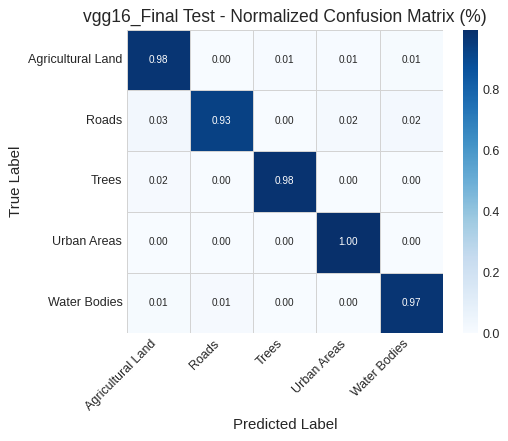

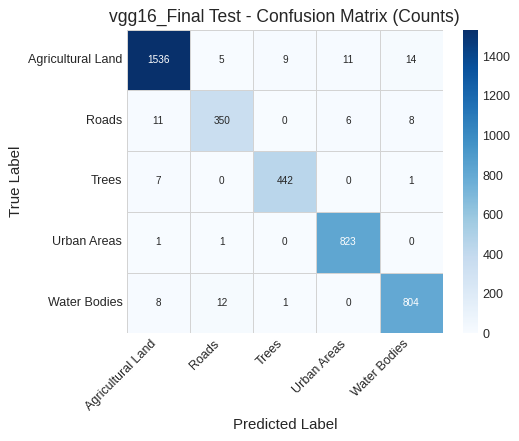


--------------------------------------------------------------------------------
✅ Step 3.12: Final Confusion Matrices plotted.
--------------------------------------------------------------------------------


Plotting Final Training History...


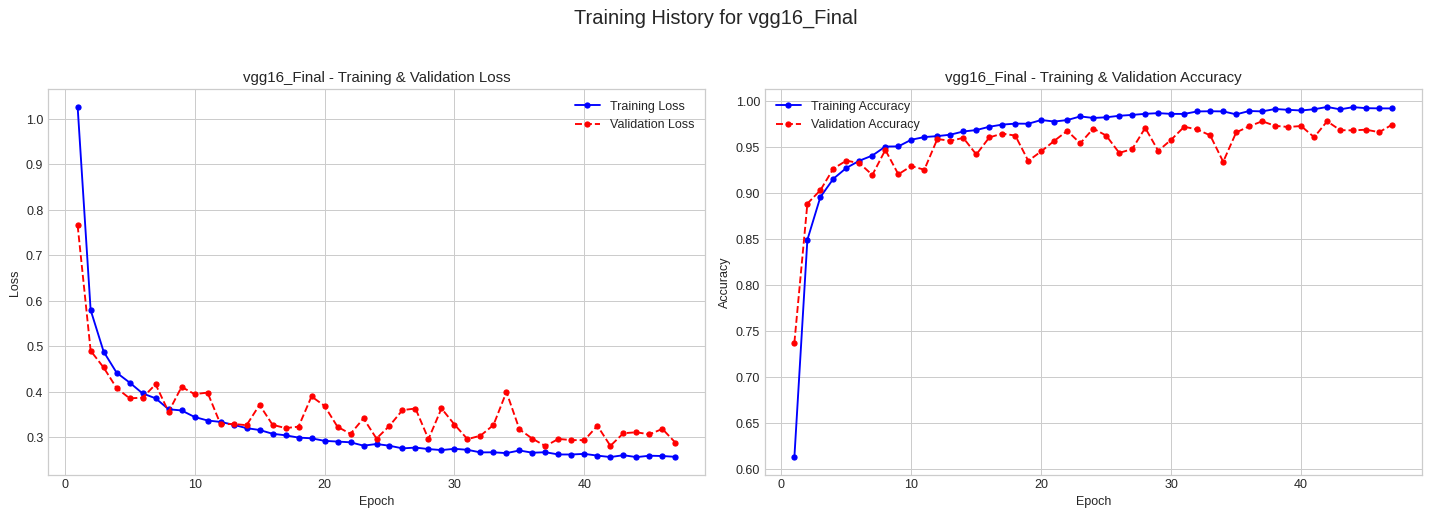


--------------------------------------------------------------------------------
✅ Step 3.12: Final training history plotted.
--------------------------------------------------------------------------------


-------------------------------------------------
✅ Milestone 3 Finished.
-------------------------------------------------



In [30]:
# --- Step 3.12: Visualize Evaluation Results ---
print("\nStep 3.12: Visualizing final model evaluation results...")
# Proceed only if the detailed evaluation was successful and results are available
if evaluation_successful and final_model_results:

    # --- Define Plotting Functions ---
    # Ensure these functions are defined before use (can be defined globally earlier or here)
    def plot_confusion_matrix(cm, class_names, model_name: str, normalize=True):
        """Plots a stylized confusion matrix with optional normalization."""
        # Check if confusion matrix data is valid
        if cm is None:
            print(f"Cannot plot Confusion Matrix for {model_name}: Matrix data is missing.")
            return False
        try:
            # Dynamically adjust figure size based on the number of classes
            figsize = (max(6, len(class_names) * 1.1), max(5, len(class_names)*0.9))
            plt.figure(figsize=figsize)
            # Handle normalization
            if normalize:
                # Calculate row sums, handle rows with zero sum to avoid NaN/errors
                row_sums = cm.sum(axis=1)[:, np.newaxis]
                # Replace 0s in row_sums with 1 to avoid division by zero; results in 0% for those rows
                row_sums[row_sums == 0] = 1
                cm_normalized = cm.astype('float') / row_sums
                fmt = '.2f' # Format for percentages
                title = f'{model_name} - Normalized Confusion Matrix (%)'
                plot_data = cm_normalized
            else:
                fmt = 'd' # Format for integer counts
                title = f'{model_name} - Confusion Matrix (Counts)'
                plot_data = cm
            # Create the heatmap using Seaborn
            sns.heatmap(plot_data, annot=True, fmt=fmt, cmap='Blues',
                        xticklabels=class_names, yticklabels=class_names,
                        linewidths=.5, linecolor='lightgray', annot_kws={"size": 8}) # Adjust annotation font size
            # Set plot labels and title
            plt.xlabel('Predicted Label', fontsize=12)
            plt.ylabel('True Label', fontsize=12)
            plt.title(title, fontsize=14)
            plt.xticks(rotation=45, ha='right') # Rotate x-labels for readability
            plt.yticks(rotation=0)
            plt.tight_layout() # Adjust layout
            plt.show() # Display the plot
            return True # Indicate success
        except Exception as plot_e:
            print(f"Error plotting confusion matrix: {plot_e}")
            return False # Indicate failure

    def plot_training_history(history_dict, model_name: str):
        """Plots training/validation loss and accuracy from a Keras history dictionary."""
        # Check if history dictionary is valid and contains necessary keys
        if not history_dict or 'loss' not in history_dict or 'accuracy' not in history_dict:
            print(f"History dictionary incomplete or missing for {model_name}. Cannot plot training history.")
            return False
        try:
            # Determine the number of epochs based on the length of the loss list
            epochs = range(1, len(history_dict['loss']) + 1)
            # Create figure with two subplots (Loss and Accuracy)
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
            # --- Loss Plot ---
            ax1.plot(epochs, history_dict['loss'], 'bo-', label='Training Loss', markersize=4)
            # Plot validation loss if available
            if 'val_loss' in history_dict:
                ax1.plot(epochs, history_dict.get('val_loss', []), 'ro--', label='Validation Loss', markersize=4)
            ax1.set_title(f'{model_name} - Training & Validation Loss')
            ax1.set_xlabel('Epoch'); ax1.set_ylabel('Loss'); ax1.legend(); ax1.grid(True)
            # --- Accuracy Plot ---
            ax2.plot(epochs, history_dict['accuracy'], 'bo-', label='Training Accuracy', markersize=4)
            # Plot validation accuracy if available
            if 'val_accuracy' in history_dict:
                ax2.plot(epochs, history_dict.get('val_accuracy', []), 'ro--', label='Validation Accuracy', markersize=4)
            ax2.set_title(f'{model_name} - Training & Validation Accuracy')
            ax2.set_xlabel('Epoch'); ax2.set_ylabel('Accuracy'); ax2.legend(); ax2.grid(True)
            # Set overall title and adjust layout
            plt.suptitle(f'Training History for {model_name}', fontsize=16)
            plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout
            plt.show() # Display the plot
            return True # Indicate success
        except Exception as plot_e:
            print(f"Error plotting training history: {plot_e}")
            return False # Indicate failure
    # --- End Plotting Function Definitions ---

    # Plot Confusion Matrix visualizations for the final evaluation on the Test Set
    print("\nPlotting Confusion Matrix (Test Set)...")
    # Plot both normalized and raw count versions
    cm_plot_norm_ok = plot_confusion_matrix(
        final_model_results['confusion_matrix'],
        final_model_results['class_names'],
        model_name=f"{final_model_results['model_name']} Test",
        normalize=True
    )
    cm_plot_abs_ok = plot_confusion_matrix(
        final_model_results['confusion_matrix'],
        final_model_results['class_names'],
        model_name=f"{final_model_results['model_name']} Test",
        normalize=False
    )
    # Report success/failure of plotting
    if cm_plot_norm_ok or cm_plot_abs_ok:
        print("\n" + "-"*80)
        print("✅ Step 3.12: Final Confusion Matrices plotted.")
        print("-" * 80 + "\n")
    else:
        print("\n" + "-"*80)
        print("❌ Step 3.12: Failed to plot final Confusion Matrices.")
        print("-" * 80 + "\n")

    # Plot the Training History from the final training run 
    print("\nPlotting Final Training History...")
    if final_model_results.get('history'):
         history_plot_ok = plot_training_history(
             final_model_results['history'],
             f"{final_model_results['model_name']}" # Use model name for title
         )
         # Report success/failure
         if history_plot_ok:
             print("\n" + "-"*80)
             print("✅ Step 3.12: Final training history plotted.")
             print("-" * 80 + "\n")
         else:
             print("\n" + "-"*80)
             print("❌ Step 3.12: Failed to plot final training history.")
             print("-" * 80 + "\n")
    else:
         # Handle case where history wasn't captured or training failed
         print("Final training history data not available for plotting.")
         print("\n" + "-"*80)
         print("⚠️ Step 3.12: Final training history plot skipped (no history data).")
         print("-" * 80 + "\n")
else:
    # Handle case where final model evaluation failed or was skipped
    print("\nSkipping evaluation visualizations as final model results are not available.")
    print("\n" + "-"*80)
    print("⚠️ Step 3.12: Evaluation visualizations skipped.")
    print("-" * 80 + "\n")

print("\n-------------------------------------------------");
print("✅ Milestone 3 Finished.");
print("-------------------------------------------------\n")

# Milestone 4: Real-Time Model Deployment and Visualization

**Objectives**
* Persist the final optimized model and associated class names for deployment.
* Outline conceptual strategies for deployment and result visualization.


**Deliverables**
* Saved final model file (.keras format) and class names file (.txt).
*  Description of potential deployment frameworks and visualization techniques.


In [31]:
print("=================================================");
print("Milestone 4: Deployment & Visualization (Conceptual)");
print("=================================================\n")

# --- Step 4.1: Saving Final Model for Deployment ---
print("\n--- Step 4.1: Saving Final Model for Deployment ---")
print("Objective: Persist the best trained model and its class mapping.")

# Initialize variables related to saving
final_model_save_path = None # Will store the Path object if save is successful
save_successful = False      # Flag to track success

# Proceed only if the final model evaluation was successful and results are available
if 'evaluation_successful' in globals() and evaluation_successful and \
   'final_model_results' in globals() and final_model_results and \
   final_model_results.get('model') and final_model_results.get('class_names'):

    # Step 4.1.1: Prepare Save Directories and Paths
    print("\nStep 4.1.1: Preparing directories and paths for saving...")
    # Ensure the target directory for the final production-ready model exists
    FINAL_MODEL_DIR.mkdir(parents=True, exist_ok=True)
    # Retrieve the final model object from the results dictionary
    model_to_save = final_model_results['model']
    # Construct a descriptive filename including the best model type
    model_save_name = f"{overall_best_model_type}_optimized_final_model.keras" # Use .keras native format
    final_model_save_path = FINAL_MODEL_DIR / model_save_name
    # Define path for the class names text file, saved alongside the model
    class_names_save_path = FINAL_MODEL_DIR / "class_names.txt"
    print(f"Target save path for model: {final_model_save_path}")
    print(f"Target save path for class names: {class_names_save_path}")
    print("\n" + "-"*80)
    print("✅ Step 4.1.1: Save paths prepared.")
    print("-" * 80 + "\n")

    # Step 4.1.2: Save Model and Class Names
    print("\nStep 4.1.2: Saving the final optimized model and class names...")
    try:
        # Save the entire model (architecture, weights, optimizer state)
        # Using the .keras format is recommended for TensorFlow >= 2.0
        model_to_save.save(final_model_save_path)
        print(f"-> Final optimized model saved successfully to: {final_model_save_path}")

        # Save the class names list to a text file, one name per line
        # Ensure they are saved in the correct order (matching generator indices)
        with open(class_names_save_path, 'w') as f:
            for name in final_model_results['class_names']:
                f.write(f"{name}\n")
        print(f"-> Class names saved successfully to: {class_names_save_path}")
        save_successful = True # Mark saving as successful
        print("\n" + "-"*80)
        print("✅ Step 4.1.2: Final optimized model and class names saved.")
        print("-" * 80 + "\n")
    except Exception as save_err:
        # Handle errors during the saving process
        print(f"\nERROR saving final model or class names: {save_err}")
        final_model_save_path = None # Invalidate path on error
        print("\n" + "-"*80)
        print("❌ Step 4.1.2: Failed to save final model or class names.")
        print("-" * 80 + "\n")
else:
    # Handle cases where the final model isn't available (e.g., training/evaluation failed)
    print("\nSkipping model saving: No final model results available from Milestone 3 or evaluation failed.")
    print("\n" + "-"*80)
    print("⚠️ Task 4.1: Model saving skipped.")
    print("-" * 80 + "\n")

Milestone 4: Deployment & Visualization (Conceptual)


--- Step 4.1: Saving Final Model for Deployment ---
Objective: Persist the best trained model and its class mapping.

Step 4.1.1: Preparing directories and paths for saving...
Target save path for model: LandCover_Egypt_Optimized_Output_Final/models/final_optimized_model/vgg16_optimized_final_model.keras
Target save path for class names: LandCover_Egypt_Optimized_Output_Final/models/final_optimized_model/class_names.txt

--------------------------------------------------------------------------------
✅ Step 4.1.1: Save paths prepared.
--------------------------------------------------------------------------------


Step 4.1.2: Saving the final optimized model and class names...
-> Final optimized model saved successfully to: LandCover_Egypt_Optimized_Output_Final/models/final_optimized_model/vgg16_optimized_final_model.keras
-> Class names saved successfully to: LandCover_Egypt_Optimized_Output_Final/models/final_optimized_model/c

In [32]:
print("\n-------------------------------------------------");
print("✅ Milestone 4 Finished (Deployment/UI Implementation Requires Separate Scripts/Frameworks).");
print("-------------------------------------------------\n")


-------------------------------------------------
✅ Milestone 4 Finished (Deployment/UI Implementation Requires Separate Scripts/Frameworks).
-------------------------------------------------



In [33]:
print("=================================================");
print("✅ End of Notebook Execution");
print("=================================================")

# Final explicit garbage collection call at the very end of the script execution
gc.collect()

✅ End of Notebook Execution


21475